# Group 11: Phase 3 - Multi-Task Object Detection and Localization for Cats and Dogs (CaDoD)

## Team Members

Kangle Li, kl66@iu.edu <br>
Genevieve Mortensen, gamorten@iu.edu <br>
Sean Dixit, sedixit@iu.edu <br>
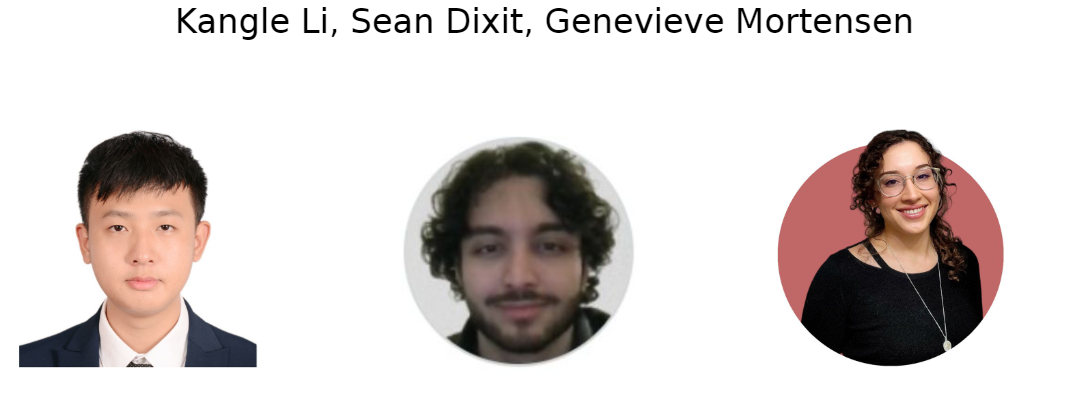

[Phase Leader Plan](https://docs.google.com/spreadsheets/d/1_yx1fk4EERuvBahTunbggOWZ7RtZmK8I5IZ6OzbBtX0/edit#gid=0) <br>
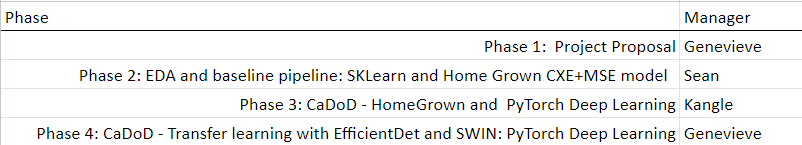

[Credit Assignment Plan](https://docs.google.com/spreadsheets/d/1_yx1fk4EERuvBahTunbggOWZ7RtZmK8I5IZ6OzbBtX0/edit#gid=0) <br>
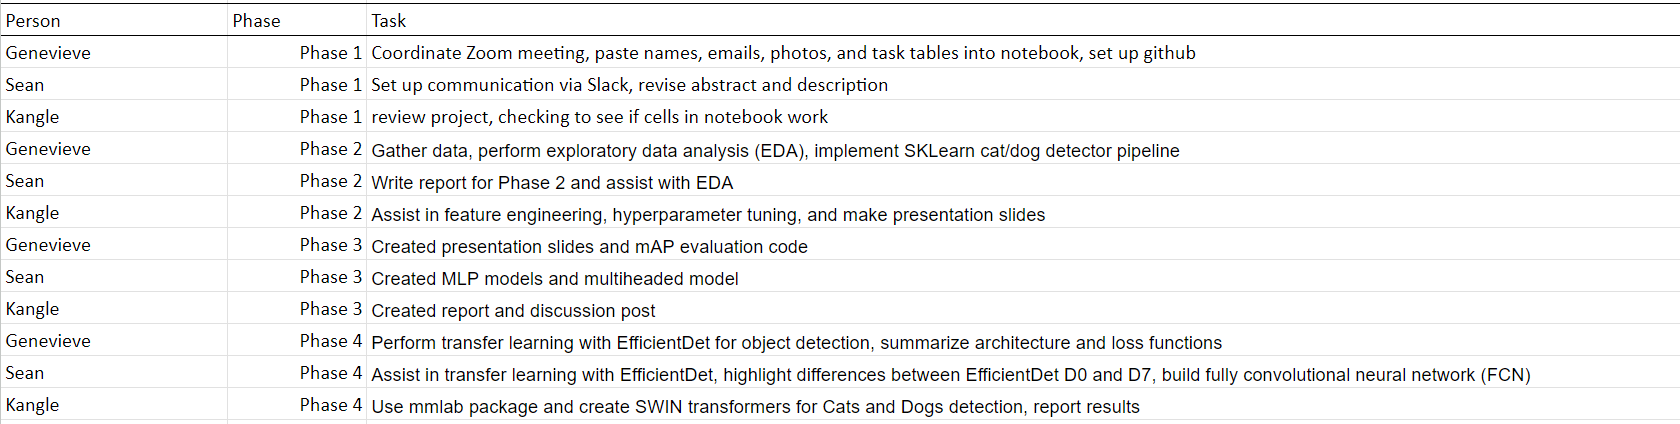

Gantt Diagram <br>
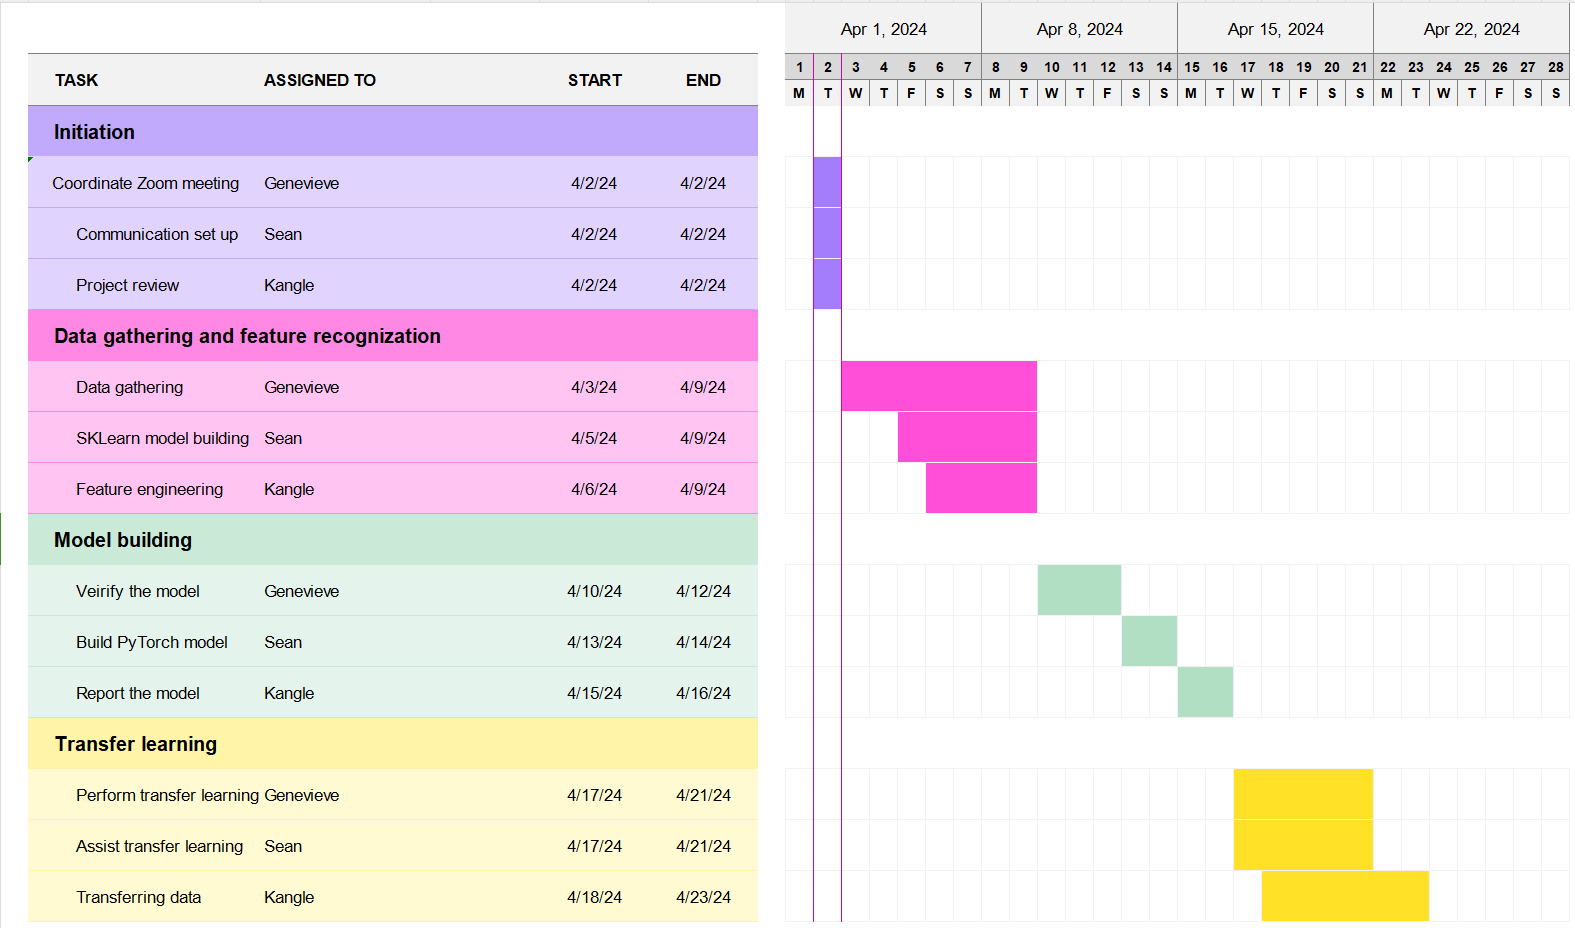

## Project Report

### Abstract

Our project involves the development of robust models for cat and dog detection. We aim to enhance the accuracy and efficiency of identifying cats and dogs within images using MLP and multiheaded models. In this phase, we aimed to create MLP models for classification and regression, and a multiheaded model to do both. We first analyzed the images in our dataset by various means, including computing number of dog vs cat class images and plotting random images with bounding boxes. We then rescaled the images and created a baseline SGDClassifier model for classifying dog vs cat and a Linear Regression model for bounding box labelling. We first tested out several hidden dimensions and learning rates for the MLP classification/regression and multiheaded models, and settled for the model with the best accuracy/MSE and mAP score. We found that our MLP classification model was able to obtain an accuracy of 60%, a ~2% difference from our baseline SGDClassifier model. Our best MLP regression model obtained an MSE of 0.55 on our test set, which is worse than our linear regression model (0.03 MSE). Our best multiheaded model obtained an mAP score of 0.4306.

### Introduction
In our project, we take on the challenging task of classifying cat vs dog pictures and create bounding boxes around them. Our goal is to develop robust models capable of accurately identifying and localizing cats and dogs in images. The purpose of this project is create an end to end pipeline in machine learning to create an object detector for cats and dogs. There are about 13,000 images of varying shapes and aspect ratios. They are all RGB images and have bounding box coordinates stored in a .csv file. In order to create a detector, we will first have to preprocess the images to be all of the same shapes, take their RGB intensity values and flatten them from a 3D array to 2D. Then we will feed this array into a linear classifier and a linear regressor to predict labels and bounding boxes.

Further more, utilizing the versatile and powerful PyTorch framework, we develop MLP models optimized for these tasks in phase 3. Our experiments are designed to refine these models to improve their performance in classifying images into categories and accurately predicting the bounding box coordinates of objects within those images. The ultimate goal is to build a reliable model that performs well against established benchmarks, paving the way for practical applications in various fields, including automated surveillance, image retrieval, and autonomous vehicles.

### Dataset
The dataset we've opted for is a subset of the Open Images Dataset V6, a comprehensive collection of labeled images spanning various categories.  It contains millions of labeled images spanning a wide variety of categories including cat and dog images, making it a valuable resource for training and evaluating object detection machine learning models. Our subset specifically focuses on images featuring cats and dogs as the primary subjects, with accompanying bounding box annotations indicating the precise location of each animal within the image. Our subset will have 12,866 images of dogs and cats. Each image is supplemented with metadata such as dimensions, file paths, and class labels, facilitating efficient model training and evaluation. The vastness of the dataset ensures a rich diversity of images capturing different breeds, poses, and environments, providing ample variation for robust model training.

We will be using a subset of the Open Images Dataset V6. It is a large-scale dataset curated by Google designed to facilitate computer vision research and development. It contains millions of labeled images spanning a wide variety of categories, making it a valuable resource for training and evaluating machine learning models. Our subset will have 12,866 images of dogs and cats.

The image archive `cadod.tar.gz` is a subset [Open Images V6](https://storage.googleapis.com/openimages/web/download.html). It contains a total of 12,966 images of dogs and cats.


Image bounding boxes are stored in the csv file `cadod.csv`. The following describes whats contained inside the csv.

* ImageID: the image this box lives in.
* Source: indicates how the box was made:
    * xclick are manually drawn boxes using the method presented in [1], were the annotators click on the four extreme points of the object. In V6 we release the actual 4 extreme points for all xclick boxes in train (13M), see below.
    * activemil are boxes produced using an enhanced version of the method [2]. These are human verified to be accurate at IoU>0.7.
* LabelName: the MID of the object class this box belongs to.
* Confidence: a dummy value, always 1.
* XMin, XMax, YMin, YMax: coordinates of the box, in normalized image coordinates. XMin is in [0,1], where 0 is the leftmost pixel, and 1 is the rightmost pixel in the image. Y coordinates go from the top pixel (0) to the bottom pixel (1).
* XClick1X, XClick2X, XClick3X, XClick4X, XClick1Y, XClick2Y, XClick3Y, XClick4Y: normalized image coordinates (as XMin, etc.) of the four extreme points of the object that produced the box using [1] in the case of xclick boxes. Dummy values of -1 in the case of activemil boxes.

The attributes have the following definitions:

* IsOccluded: Indicates that the object is occluded by another object in the image.
* IsTruncated: Indicates that the object extends beyond the boundary of the image.
* IsGroupOf: Indicates that the box spans a group of objects (e.g., a bed of flowers or a crowd of people). We asked annotators to use this tag for cases with more than 5 instances which are heavily occluding each other and are physically touching.
* IsDepiction: Indicates that the object is a depiction (e.g., a cartoon or drawing of the object, not a real physical instance).
* IsInside: Indicates a picture taken from the inside of the object (e.g., a car interior or inside of a building).
For each of them, value 1 indicates present, 0 not present, and -1 unknown.

### Pipelines

#### Stochastic Gradient Descent Classifier (SGDC) as Baseline Classifier

Before delving into our custom implementations, it's important to establish the Stochastic Gradient Descent Classifier (SGDC) as our baseline model. SGDC, a linear regressor widely used for classification tasks, offers a robust point of comparison for our more specialized models. Its efficiency and simplicity make SGDC an excellent linear regression baseline for large data, against which the performance and complexity of our homegrown models can be evaluated.

#### Multi-Output Linear Regression as Baseline Regressor

Linear Regression is a fundamental algorithm in machine learning for predicting continuous values. In our custom model, we extend this concept to predict multiple outputs at once, targeting scenarios where we need to predict four related values, such as the coordinates of a bounding box in an image (x, y, width, height). This extension aims to improve upon the baseline by offering predictions that are not just categorical but spatially informative as well.

#### MLP Classifier/Regressor

Multilayer Perceptron models are algorithms in ML that are able to do both classification and regression. MLPs can capture complex non-linear relationships in the data, which is often essential for distinguishing between different classes in image data. In our MLP classification, we have 49152 input features (pixels for each image), 2 hidden layers with varying number of neurons (tested multiple models), and 1 2-neuron output layer. We use RelU activation between each layer. For our MLP regression model, we have 49152 input features, 2 hidden layers with varying number of neurons (tested multiple models), and 1 4-neuron output layer (i.e the coordinates for each of the 4 corners of the bounding boxes).

#### Multiheaded Model

Our multi headed model is a neural network architecture designed for the combined tasks of image classification and object localization, specifically for distinguishing between images of dogs and cats and predicting bounding boxes around the detected objects. Our multiheaded model uses CXE as the classification loss metric and MSE as the regression loss metric. The classification branch comprises three fully connected layers (fc_cls1, fc_cls2, and fc_cls3). The first layer takes an input of 49,152 features, likely representing the flattened output of a feature extractor or a convolutional neural network (CNN). This layer reduces the features to 512 dimensions, which is further processed by the subsequent layers to make a final prediction. The final layer of this branch outputs a probability distribution over two classes: dog and cat.

On the other hand, the regression branch handles the bounding box prediction task. It also consists of three fully connected layers (fc_reg1, fc_reg2, and fc_reg3). Like the classification branch, the first layer takes the same 49,152-dimensional input and reduces it to 512 dimensions. The following layers further refine this representation to produce a final output consisting of four values. These four values represent the coordinates of the bounding box: (x_min, y_min, x_max, y_max).

### EDA
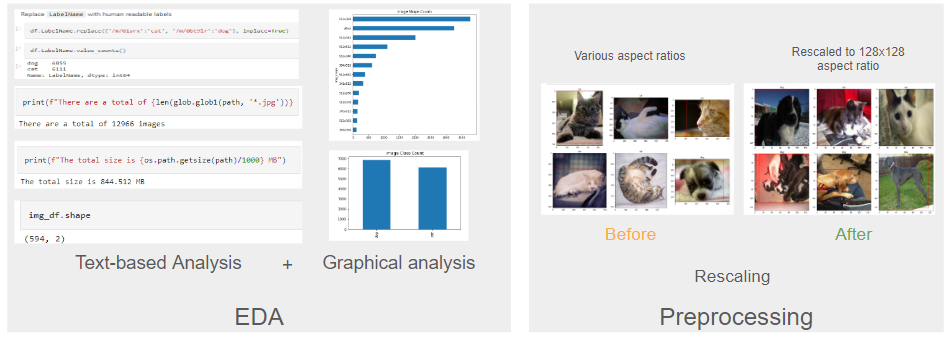

In the previous phase, we first analyzed the images in our dataset (i.e a subset of the Open Images Dataset V6) by various means, including computing the number of images, shape of the images dataframe, number of dog vs cat class images, size of the dataset and number of image aspect ratio types. We also changed the label names to human readable labels.

Upon analysis of the dataset, we found that it contains 12966 images in total (of dogs and cats), with a total size of 844.512 MB. The number of dog images outweighed the number of cat images, as there were 6855 dog images and 6111 cat images. We also plotted the different aspect ratios of images in the dataset as there were many different types of aspect ratios present in the dataset. We found that the most common aspect ratio was 512x384. We filtered image shapes with count less than 100 into a separate category called other to simplify the processing. 

We then plotted 6 random images using matplotlib along with their corresponding bounding boxes. We rescaled the images to 128x128 aspect ratio to standardize the images and save space/time for storing and processing.  

Before resizing: (notice how they are rectangular) <br>
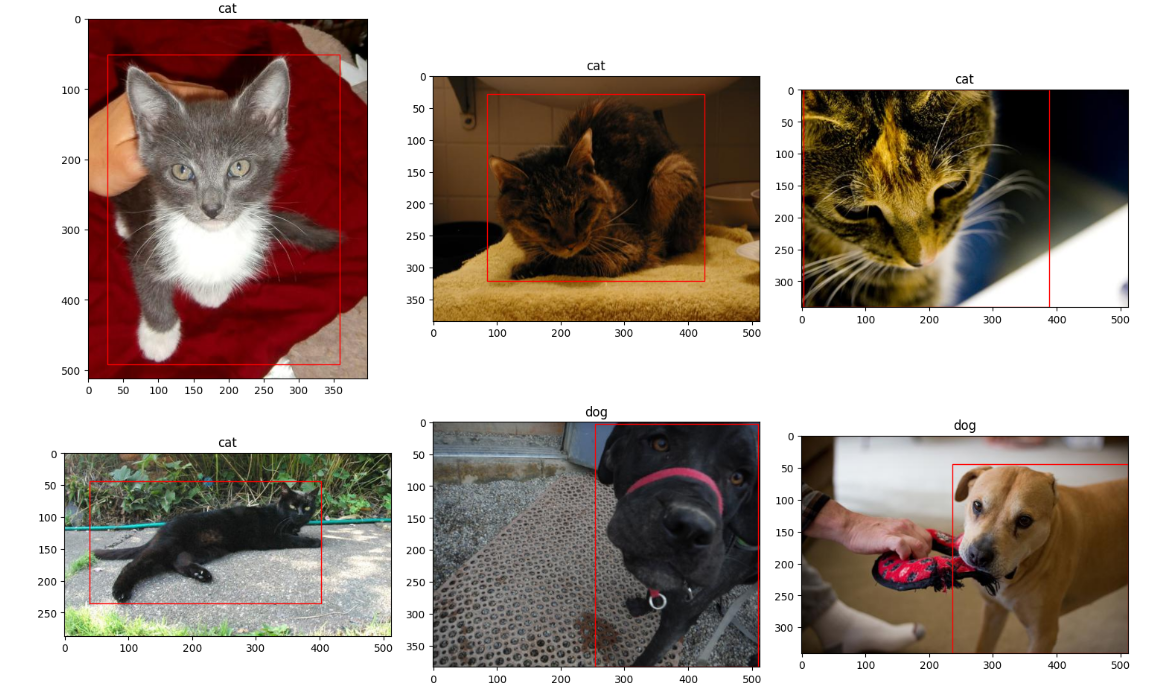

After resizing to 128x128 aspect ratio: <br>
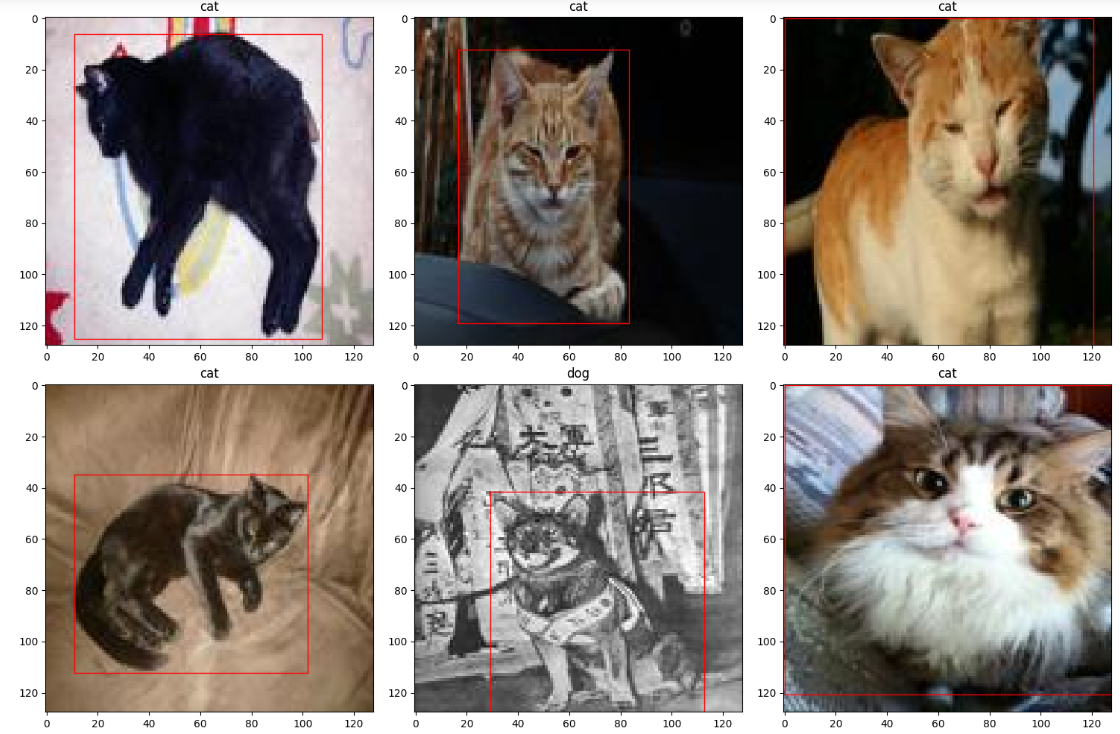

### Pytorch models for cat vs dog detection
Our methodology consists of three critical components:
#### MLP for Classification
A PyTorch-based MLP model designed to classify the content within the image, specifically distinguishing between categories such as 'cat' and 'dog'.
#### MLP for Bounding Box Regression
A parallel MLP model tasked with regressing the bounding box coordinates—[x, y, width, height]—of the detected object.
#### Multi-Headed Cat-Dog Detection
An innovative approach that integrates both classification and regression outputs through a multi-headed architecture, facilitating a combined learning process that leverages a multitask loss function composed of Cross-Entropy (CXE) for classification and Mean Squared Error (MSE) for bounding box regression.

Crucially, we incorporate the IoU metric, defined as IoU(A, B) = |A ∩ B| / |A ∪ B|, where A is the set of proposed object pixels, and B is the set of true object pixels. IoU serves as a robust measure for evaluating how well our proposed bounding boxes align with the ground truth.

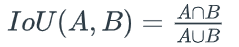


### Experiments
Project Workflow Block Diagram <br>
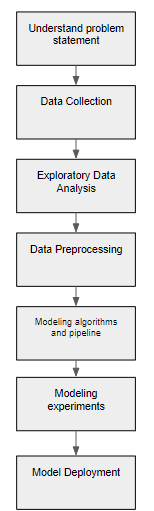

We first tried to undestand the problem statement, including what models we can create to do classification and localization. We then did data collection (simply used the pre-existing dataset). We then performed EDA to understand the structure of the data as well as some patterns. Then we did some data preprocessing, including normalization for the MLP models and changing size to fix amount. Then we created the models and ran them on the test set to compare them to one another, and upon finding the best model, we chose it to be our main model (for deployment in practical scenario). For MLP regression specifically, our main model was ran for more epochs to obtain a better score.


#### Metrics

##### Performance Metric: Accuracy

For the classifier machine learning pipelines, we evaluate performance primarily through the metric of accuracy. Accuracy is defined as the proportion of true results (both true positives and true negatives) among the total number of cases examined. Mathematically, it is expressed as:

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$

where:
- $TP$ = True Positives
- $TN$ = True Negatives
- $FP$ = False Positives
- $FN$ = False Negatives

Accuracy provides a straightforward measure of how well our model correctly identifies or predicts the target variable.

##### SGD Classifier Pipeline: Utilizing MSE

For our Stochastic Gradient Descent Classifier (SGDC) pipeline, we employ the Mean Squared Error (MSE) as a specific performance metric. MSE measures the average squared difference between the estimated values and the actual value, offering insight into the precision of continuous value prediction within our classification process. MSE is given by:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

where:
- $n$ is the number of samples,
- $y_i$ is the actual value of the $i^{th}$ sample,
- $\hat{y}_i$ is the predicted value for the $i^{th}$ sample.

This formula allows us to quantify the deviation of the predicted continuous values from their actual values, thus offering a nuanced understanding of the model's predictive accuracy, especially in tasks where precision in the continuous output space is crucial.

##### Multi-Output Linear Regression Loss Function: Mean Squared Error (MSE)

The Mean Squared Error (MSE) is a common loss function used in regression, measuring the average squared difference between estimated values and the actual value. For a multi-output scenario, the MSE is calculated for each target independently and then averaged. The equation for MSE when extending to four targets is given by:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{1}{4} \sum_{j=1}^{4} (y_{ij} - \hat{y}_{ij})^2 \right) $$

where $n$ is the number of samples, $y_{ij}$ is the actual value for the $j^{th}$ target of the $i^{th}$ sample, and $\hat{y}_{ij}$ is the predicted value for the $j^{th}$ target of the $i^{th}$ sample.

##### Loss Function: Cross-Entropy + Mean Squared Error

To accommodate the dual objectives of classification and regression, we combine the Cross-Entropy (CXE) loss for the classification task with the Mean Squared Error (MSE) loss for the regression task. The total loss is a weighted sum of these two losses:

$$ Total Loss = \lambda \cdot CXE + (1 - \lambda) \cdot MSE $$

where $\lambda$ is a hyperparameter that balances the contribution of each loss component.

#### Results
##### Baseline 
Our experimental baseline models are as follows: <br>
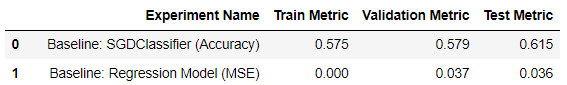

NOTE: we used the same family of input features for both, i.e all of the features in the dataset.

##### Pytorch models 
Images are first normalized using z-score normalization to ensure that the pixel values have a mean of 0 and a standard deviation of 1. <br>
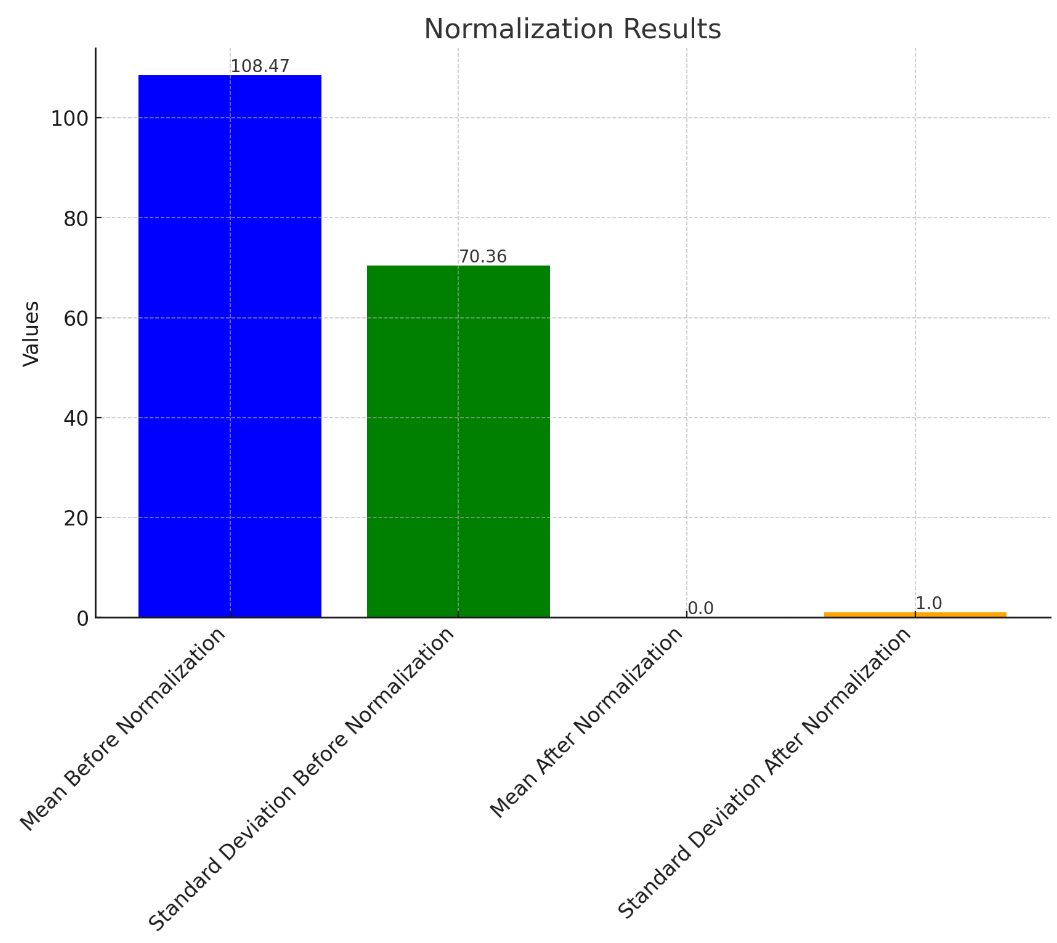

Then the dataset is split into training, validation, and testing parts.  1% of the data is kept for testing, and 10% of the training data is used as a validation set.<br>
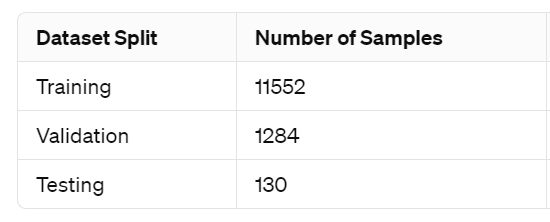

Different hyperparameters are tried out in our MLP model for image classification to see which gives the best results.  Hyperparameters include the dimension of the hidden layers and the learning rate.  Adam optimizer and CrossEntropyLoss are used.
We first tried 5 different combinations of hidden layers and learning rate, and found the following: <br>
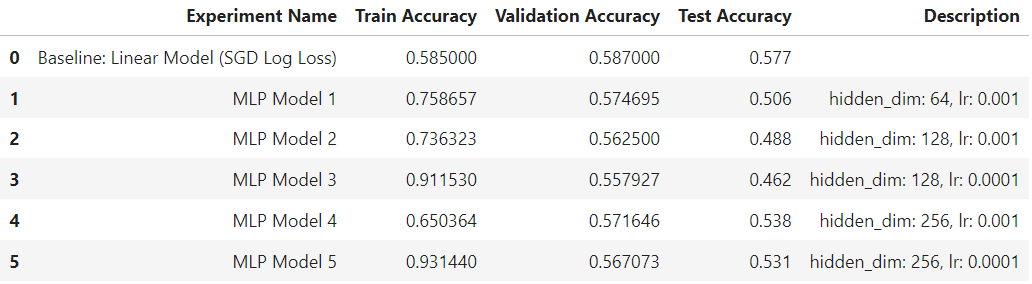

The best performing MLP model has 256 hidden dimensions and a learning rate of 0.001 (with 2 hidden layers and ReLU activation function after each linear transformation in hidden layers), and it got a test accuracy of 53.8%, which is worse than our baseline Linear Model.

It seems as we increase the hidden layer dimensions, the test accuracy increases. So we then test with 3 more models with higher hidden layer dimensions, and found the following: <br>
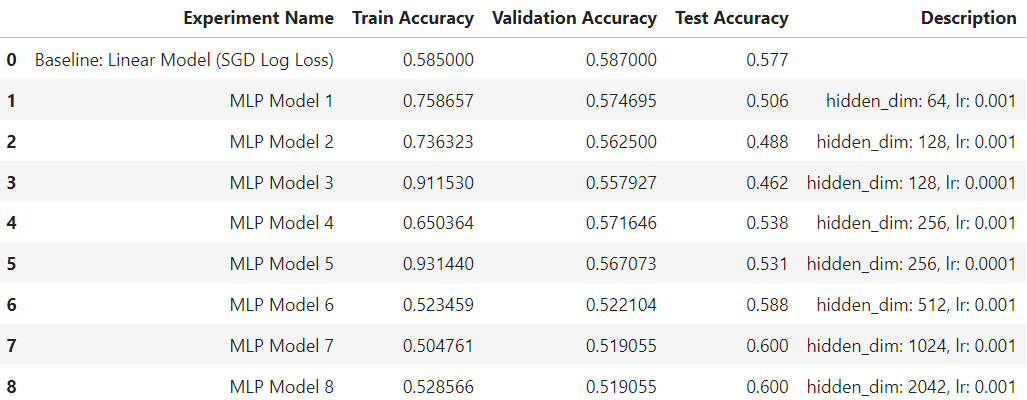

The best MLP classification model came out to be MLP Model 8, with hidden layer dimensions = 2042, a learning rate of 0.001 and an accuracy of 60%. It exceeds the baseline accuracy of the linear SGD classification model.

We then test different hidden layer dimension and learning rates for the MLP regression model as well, this time with number of epochs = 100 at first and using MSE as the loss function along with Adam optimization.
We then choose the best MLP regression model (model 5) and run it for 1000 epochs to obtain our best model. <br>
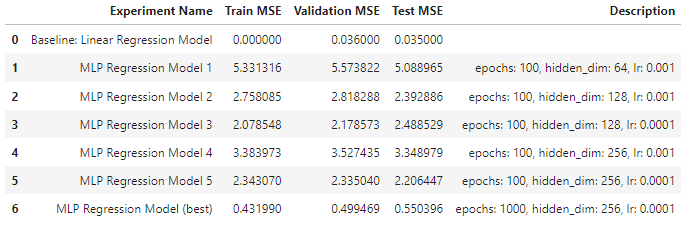

For multiheaded dog/cat detection, we made a model that consists of two separate multi-layer perceptrons (MLPs): one for classification and another for regression. Each MLP has three fully connected layers followed by ReLU activation functions. The classification MLP takes an input tensor and outputs a classification result with a size defined by output_dim_cls, representing the number of classes. Meanwhile, the regression MLP takes the same input tensor and produces a regression output with a size defined by output_dim_reg, indicating the number of regression outputs. The model's architecture enables it to handle both classification and regression tasks simultaneously. 

We ran the model for 30 epochs for 3 different hidden_dim and learning rate combinations. In this case, we chose to only increase the hidden_dim values as it seemed learning rate didn't make a big difference in our previous models. We plotted out the graphs with epochs as the x axis and metric values as the y axis (MSE/CXE). The graph is as follows: <br>
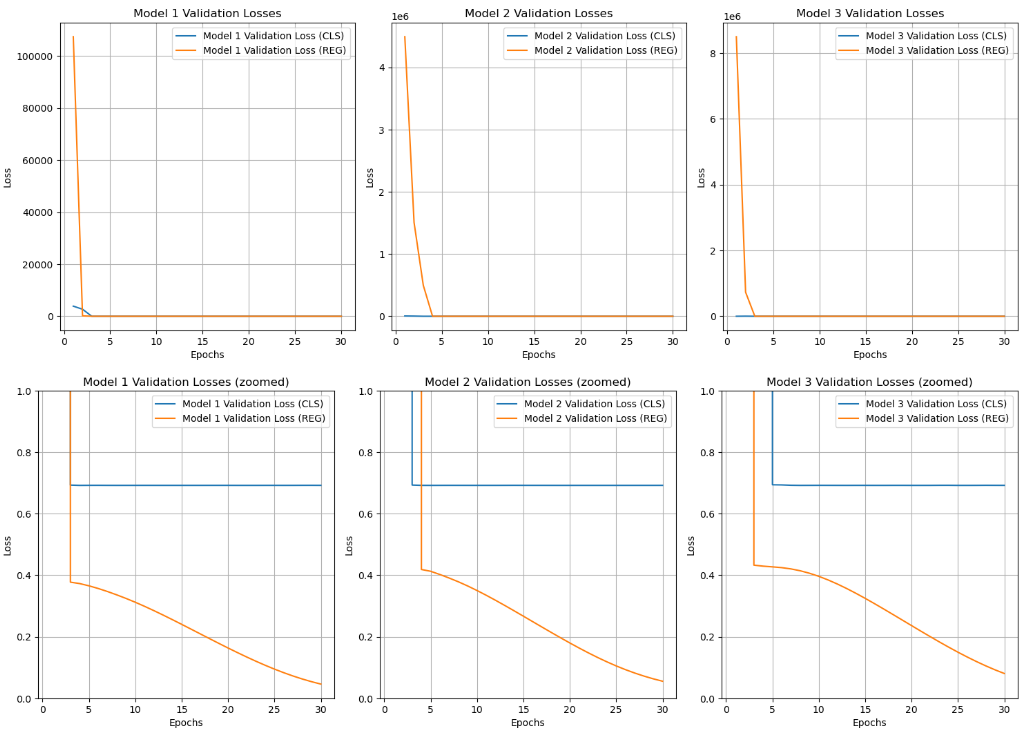

We then find the mAP (IOU) results for each, and plot the results in a dataframe:<br>

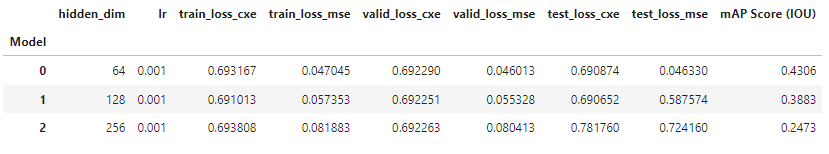

The best performing model for cat/dog detection is Model 0, with hidden_dim=64 and lr=0.001, which got an mAP Score of 0.4306. This model will act as the baseline pipeline for our next phase. We have every model from the experiments saved as .pt files, which can be used as pre-trained model at any time.

In total, we ran 8 experiments for MLP classification, 6 experiments for MLP regression, and 3 experiments for the multiheaded model. 

### Discussion
In phase 3, we investigated the performance of MLP models for image classification, regression, and multiheaded dog/cat detection. Overall, the results were promising for image classification and multiheaded detection, but less conclusive for regression.

For image classification, we found that increasing the hidden layer dimension of the MLP significantly improved performance. The best MLP model achieved an accuracy of 60%, exceeding the baseline accuracy of the linear SGD classifier (57.7%). This suggests that MLPs can be effective for this task, particularly with careful hyperparameter tuning.

For MLP regression, the findings were less impressive. The best MLP regressor model achieved a test MSE loss of 0.55, which is way higher compared to the baseline linear regression model (0.035). It's possible that exploring a wider range of hyperparameters or introducing more complex model architectures might be necessary for regression tasks.

The multiheaded model for dog/cat detection achieved a best mAP score of 0.4306. While this is a moderate score, it demonstrates the potential of this approach for combining classification and regression tasks within a single model. Further exploration with different hyperparameter settings or model architectures could potentially improve these results. It should be noted that the MSE score for the best multiheaded model was still lower than the baseline linear regression model's MSE score, but a lot closer than the MLP regression model. The multiheaded model achieved an MSE score of 0.04 on the test set, while the baseline linear regression model achieved an MSE score of 0.035.

In future work, it would be beneficial to perform a grid search or randomized search to explore a larger range of hyperparameter combinations for all three tasks. Additionally, exploring more complex architectures, such as convolutional neural networks (CNNs), specifically designed for image data, could be a promising avenue for further improvement.
It would be interesting to see if we could improve the MSE score for the multiheaded classification and localization model. We achieved an mAP score of 0.4306, and this model will act as the baseline for our next phase, where we will try to improve this score. 

### Conclusion
Our project focuses on the development of robust models for cat and dog detection (CaDoD), aiming to accurately classify images containing these animals and precisely localize their bounding boxes. This task holds significant importance in various real-world applications, including wildlife conservation, pet monitoring, and security surveillance.

Our hypothesis posited that machine learning pipelines with custom features can effectively accomplish the task of cat and dog detection and classification. Throughout the project, we conducted thorough exploratory data analysis, implemented baseline models using scikit-learn and pytorch, and evaluated their performance using relevant metrics. Our experiments with MLP classifiers and regressors revealed promising results, with the best MLP classification achieving a 60% accuracy, closely trailing our baseline SGDClassifier. However, the regression model fell short, indicating room for improvement in localizing bounding boxes. Our multiheaded model showcased the potential of combining classification and regression tasks, achieving an mAP score of 0.4306.

The pytorch model underlines the potential of MLPs in object detection when used within a robust framework like PyTorch. While certain configurations show promise, others indicate a need for further optimization. The insights gained from this phase provide a solid foundation for subsequent development and iterations, ultimately advancing the field of object detection. Moving forward, we envision incorporating MLP models using Pytorch for image classifcation and regression along with deep learning models such as CNNs, EfficientNets and SWIN transformers and further refining our models to achieve higher accuracy in cat and dog detection/classification.

### Bibliography
None


In [1]:
from collections import Counter
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
import tarfile
from tqdm.notebook import tqdm
import warnings

# Import Data

### Unarchive data

In [2]:
def extract_tar(file, path):
    """
    function to extract tar.gz files to specified location
    
    Args:
        file (str): path where the file is located
        path (str): path where you want to extract
    """
    with tarfile.open(file) as tar:
        files_extracted = 0
        for member in tqdm(tar.getmembers()):
            if os.path.isfile(path + member.name[1:]):
                continue
            else:
                tar.extract(member, path)
                files_extracted += 1
        tar.close()
        if files_extracted < 3:
            print('Files already exist')

In [3]:
path = '../images'

In [4]:
extract_tar('cadod.tar.gz', path)

  0%|          | 0/25936 [00:00<?, ?it/s]

Files already exist


In [5]:
print(os.listdir())

['-p', '.ipynb_checkpoints', 'cadod.csv', 'cadod.tar.gz', 'CaDoD_Phase_2_baseline_SKLearn_homegrown.ipynb', 'data', 'Group11_Phase2 .ipynb', 'Group11_Phase3.ipynb', 'Group11_Phase3_1.ipynb', 'images', 'Shape_detector_via_EfficientDet', 'temp.txt']


### Load bounding box meta data

In [6]:
import pandas as pd
df = pd.read_csv('cadod.csv')

In [7]:
df.head()

ImageID  Source  LabelName  Confidence      XMin      XMax  \
0  0000b9fcba019d36  xclick  /m/0bt9lr           1  0.165000  0.903750   
1  0000cb13febe0138  xclick  /m/0bt9lr           1  0.000000  0.651875   
2  0005a9520eb22c19  xclick  /m/0bt9lr           1  0.094167  0.611667   
3  0006303f02219b07  xclick  /m/0bt9lr           1  0.000000  0.999219   
4  00064d23bf997652  xclick  /m/0bt9lr           1  0.240938  0.906183   

       YMin      YMax  IsOccluded  IsTruncated  ...  IsDepiction  IsInside  \
0  0.268333  0.998333           1            1  ...            0         0   
1  0.000000  0.999062           1            1  ...            0         0   
2  0.055626  0.998736           1            1  ...            0         0   
3  0.000000  0.998824           1            1  ...            0         0   
4  0.000000  0.694286           0            0  ...            0         0   

   XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  XClick3Y  \
0  0.636250  0.903750  0.748750  0.165000  0.268333  0.506667  0.998333   
1  0.312500  0.000000  0.317500  0.651875  0.000000  0.410882  0.999062   
2  0.487500  0.611667  0.243333  0.094167  0.055626  0.226296  0.998736   
3  0.508594  0.999219  0.000000  0.478906  0.000000  0.375294  0.720000   
4  0.678038  0.906183  0.240938  0.522388  0.000000  0.370000  0.424286   

   XClick4Y  
0  0.661667  
1  0.999062  
2  0.305942  
3  0.998824  
4  0.694286  

[5 rows x 21 columns]

# Exploratory Data Analysis

## Statistics

In [8]:
print(f"There are a total of {len(glob.glob1(path, '*.jpg'))} images")

There are a total of 12966 images


In [9]:
print(f"The total size is {os.path.getsize(path)/1000} MB")

The total size is 9437.184 MB


In [10]:
df.shape

(12966, 21)

Replace `LabelName` with human readable labels

In [11]:
df.LabelName.replace({'/m/01yrx':'cat', '/m/0bt9lr':'dog'}, inplace=True)

In [12]:
df.LabelName.value_counts()

LabelName
dog    6855
cat    6111
Name: count, dtype: int64

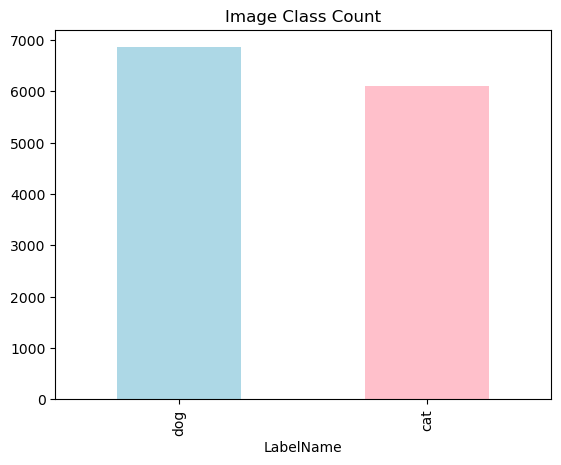

In [13]:
df.LabelName.value_counts().plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Image Class Count')
plt.show()

In [14]:
df.describe()

Confidence          XMin          XMax          YMin          YMax  \
count     12966.0  12966.000000  12966.000000  12966.000000  12966.000000   
mean          1.0      0.099437      0.901750      0.088877      0.945022   
std           0.0      0.113023      0.111468      0.097345      0.081500   
min           1.0      0.000000      0.408125      0.000000      0.451389   
25%           1.0      0.000000      0.830625      0.000000      0.910000   
50%           1.0      0.061250      0.941682      0.059695      0.996875   
75%           1.0      0.167500      0.998889      0.144853      0.999062   
max           1.0      0.592500      1.000000      0.587088      1.000000   

         IsOccluded   IsTruncated     IsGroupOf   IsDepiction      IsInside  \
count  12966.000000  12966.000000  12966.000000  12966.000000  12966.000000   
mean       0.464754      0.738470      0.013651      0.045427      0.001157   
std        0.499239      0.440011      0.118019      0.209354      0.040229   
min       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      0.000000   
75%        1.000000      1.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           XClick1X      XClick2X      XClick3X      XClick4X      XClick1Y  \
count  12966.000000  12966.000000  12966.000000  12966.000000  12966.000000   
mean       0.390356      0.424582      0.494143      0.506689      0.275434   
std        0.358313      0.441751      0.405033      0.462281      0.415511   
min       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%        0.221292      0.096875      0.285071      0.130000      0.024323   
50%        0.435625      0.415625      0.531919      0.623437      0.146319   
75%        0.609995      0.820000      0.787500      0.917529      0.561323   
max        0.999375      0.999375      1.000000      0.999375      0.999375   

           XClick2Y      XClick3Y      XClick4Y  
count  12966.000000  12966.000000  12966.000000  
mean       0.447448      0.641749      0.582910  
std        0.401580      0.448054      0.403454  
min       -1.000000     -1.000000     -1.000000  
25%        0.218333      0.405816      0.400000  
50%        0.480838      0.825000      0.646667  
75%        0.729069      0.998042      0.882500  
max        0.999375      1.000000      0.999375

## Sample of Images

C:\Users\postw\AppData\Local\Temp\ipykernel_32004\88787746.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[i].add_patch(plt.Rectangle((coords[0]*w, coords[2]*h),
C:\Users\postw\AppData\Local\Temp\ipykernel_32004\88787746.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coords[1]*w-coords[0]*w, coords[3]*h-coords[2]*h,


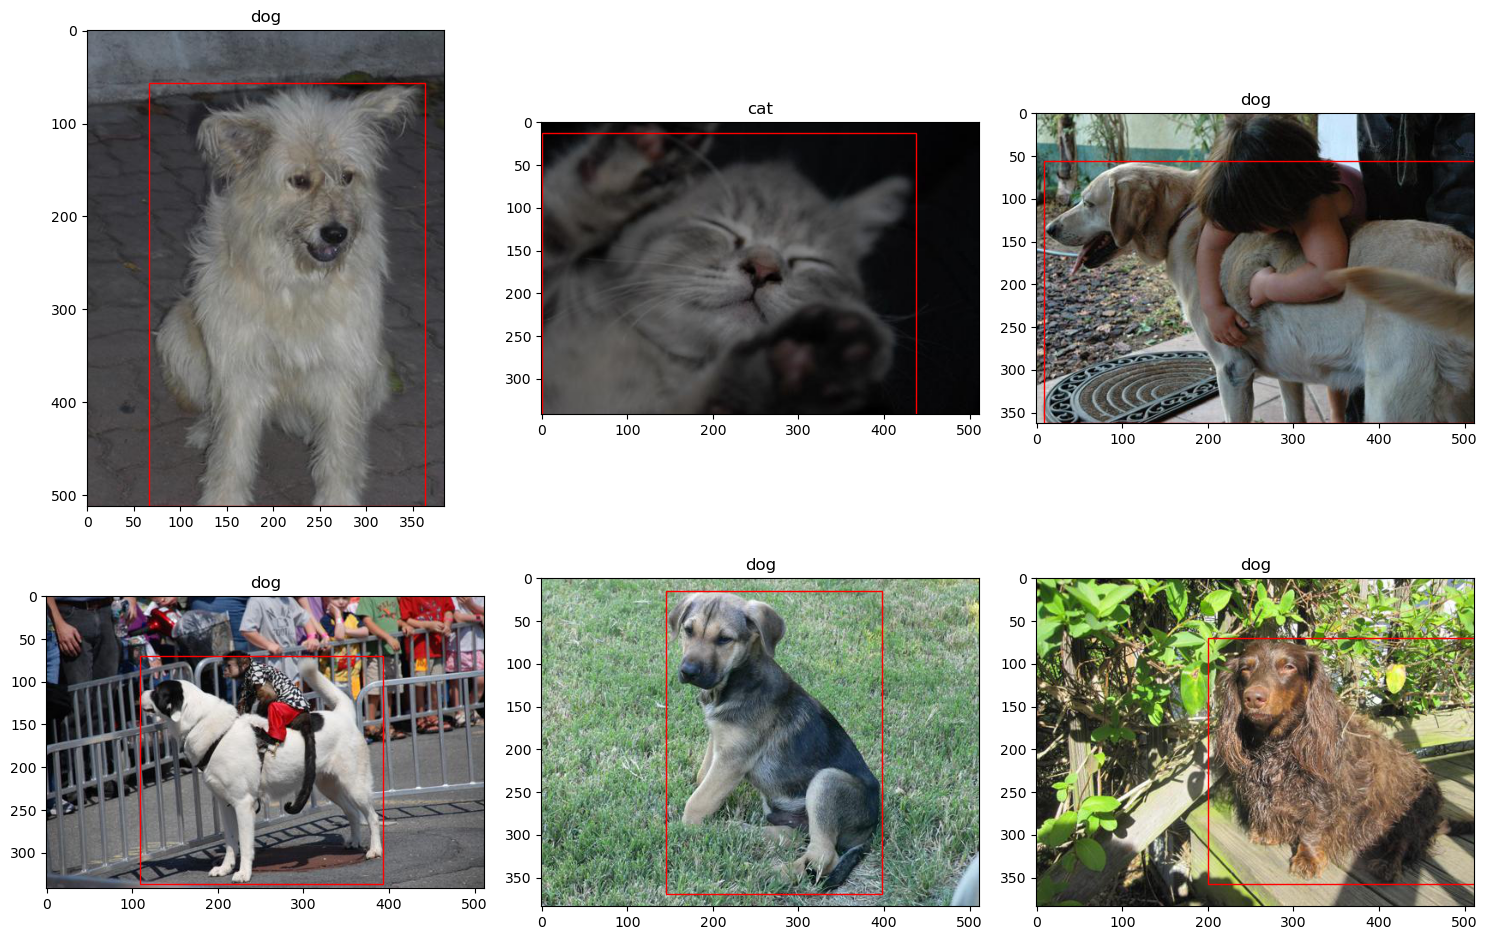

In [15]:
# plot random 6 images
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False,figsize=(15,10))
ax = ax.flatten()

for i,j in enumerate(np.random.choice(df.shape[0], size=6, replace=False)):
    img = mpimg.imread(path + '/' + df.ImageID.values[j] + '.jpg')
    h, w = img.shape[:2]
    coords = df.iloc[j,4:8]
    ax[i].imshow(img)
    ax[i].set_title(df.LabelName[j])
    ax[i].add_patch(plt.Rectangle((coords[0]*w, coords[2]*h), 
                                  coords[1]*w-coords[0]*w, coords[3]*h-coords[2]*h, 
                                  edgecolor='red', facecolor='none'))

plt.tight_layout()
plt.show()

## Image shapes and sizes

Go through all images and record the shape of the image in pixels and the memory size

In [16]:
img_shape = []
img_size = np.zeros((df.shape[0], 1))

for i,f in enumerate(tqdm(glob.glob1(path, '*.jpg'))):
    file = path+'/'+f
    img = Image.open(file)
    img_shape.append(f"{img.size[0]}x{img.size[1]}")
    img_size[i] += os.path.getsize(file)

  0%|          | 0/12966 [00:00<?, ?it/s]

Count all the different image shapes

In [17]:
img_shape_count = Counter(img_shape)

In [18]:
# create a dataframe for image shapes
img_df = pd.DataFrame(set(img_shape_count.items()), columns=['img_shape','img_count'])

In [19]:
img_df.shape

(594, 2)

There are a ton of different image shapes. Let's narrow this down by getting a sum of any image shape that has a cout less than 100 and put that in a category called `other`

In [20]:
new_row = pd.DataFrame({'img_shape': ['other'], 'img_count': [img_df[img_df.img_count < 100].img_count.sum()]})
img_df = pd.concat([img_df, new_row], ignore_index=True)


Drop all image shapes

In [21]:
img_df = img_df[img_df.img_count >= 100]

Check if the count sum matches the number of images

In [22]:
img_df.img_count.sum() == df.shape[0]

True

Plot

## Plot aspect ratio

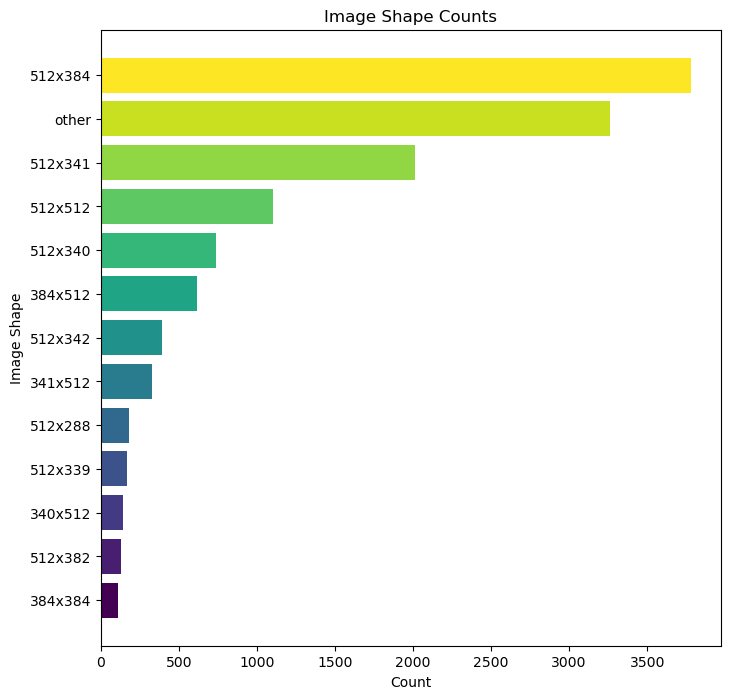

In [23]:
img_df.sort_values('img_count', inplace=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(img_df)))
plt.figure(figsize=(8, 8))
bars = plt.barh(img_df['img_shape'], img_df['img_count'], color=colors)
plt.title('Image Shape Counts')
plt.xlabel('Count')
plt.ylabel('Image Shape')
plt.show()


In [24]:
# convert to megabytes
img_size = img_size / 1000

The image size distribution is very obviously skewed. The data requires preprocessing.

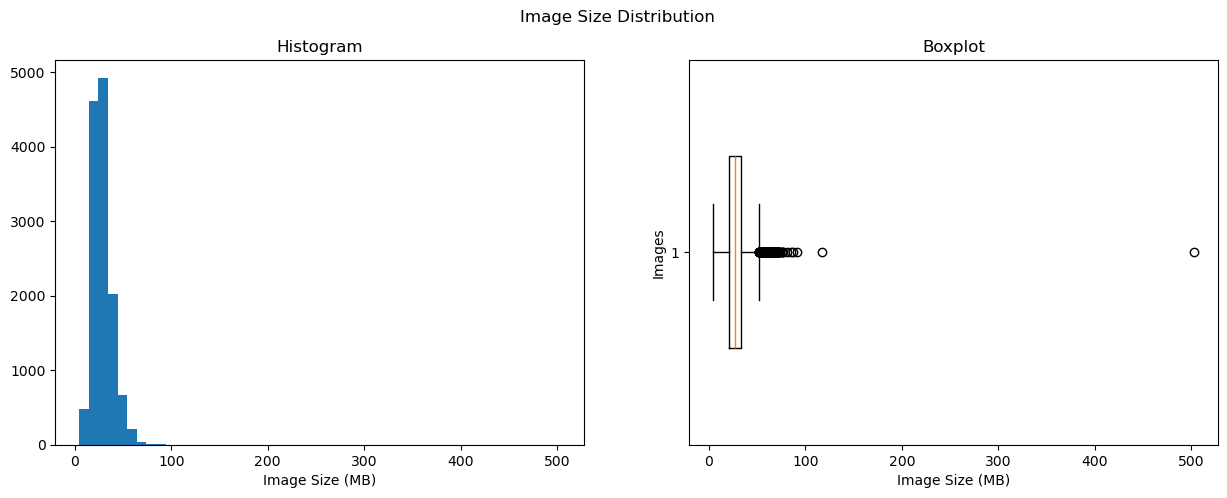

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Image Size Distribution')
ax[0].hist(img_size, bins=50)
ax[0].set_title('Histogram')
ax[0].set_xlabel('Image Size (MB)')
ax[1].boxplot(img_size, vert=False, widths=0.5)
ax[1].set_title('Boxplot')
ax[1].set_xlabel('Image Size (MB)')
ax[1].set_ylabel('Images')
plt.show()

# Preprocess

## Rescale the images

In [26]:
!mkdir ../images/resized

The syntax of the command is incorrect.


In [27]:
%%time
# resize image and save, convert to numpy

img_arr = np.zeros((df.shape[0],128*128*3)) # initialize np.array

for i, f in enumerate(tqdm(df.ImageID)):
    img = Image.open(path + '/' + f + '.jpg')
    img_resized = img.resize((128,128))
    img_resized.save("../images/resized/"+f+'.jpg', "JPEG", optimize=True)
    img_arr[i] = np.asarray(img_resized, dtype=np.uint8).flatten()

  0%|          | 0/12966 [00:00<?, ?it/s]

CPU times: total: 20.5 s
Wall time: 52.6 s


Plot the resized and filtered images

C:\Users\postw\AppData\Local\Temp\ipykernel_32004\245110220.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[i].add_patch(plt.Rectangle((coords[0]*w, coords[2]*h),
C:\Users\postw\AppData\Local\Temp\ipykernel_32004\245110220.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coords[1]*w-coords[0]*w, coords[3]*h-coords[2]*h,


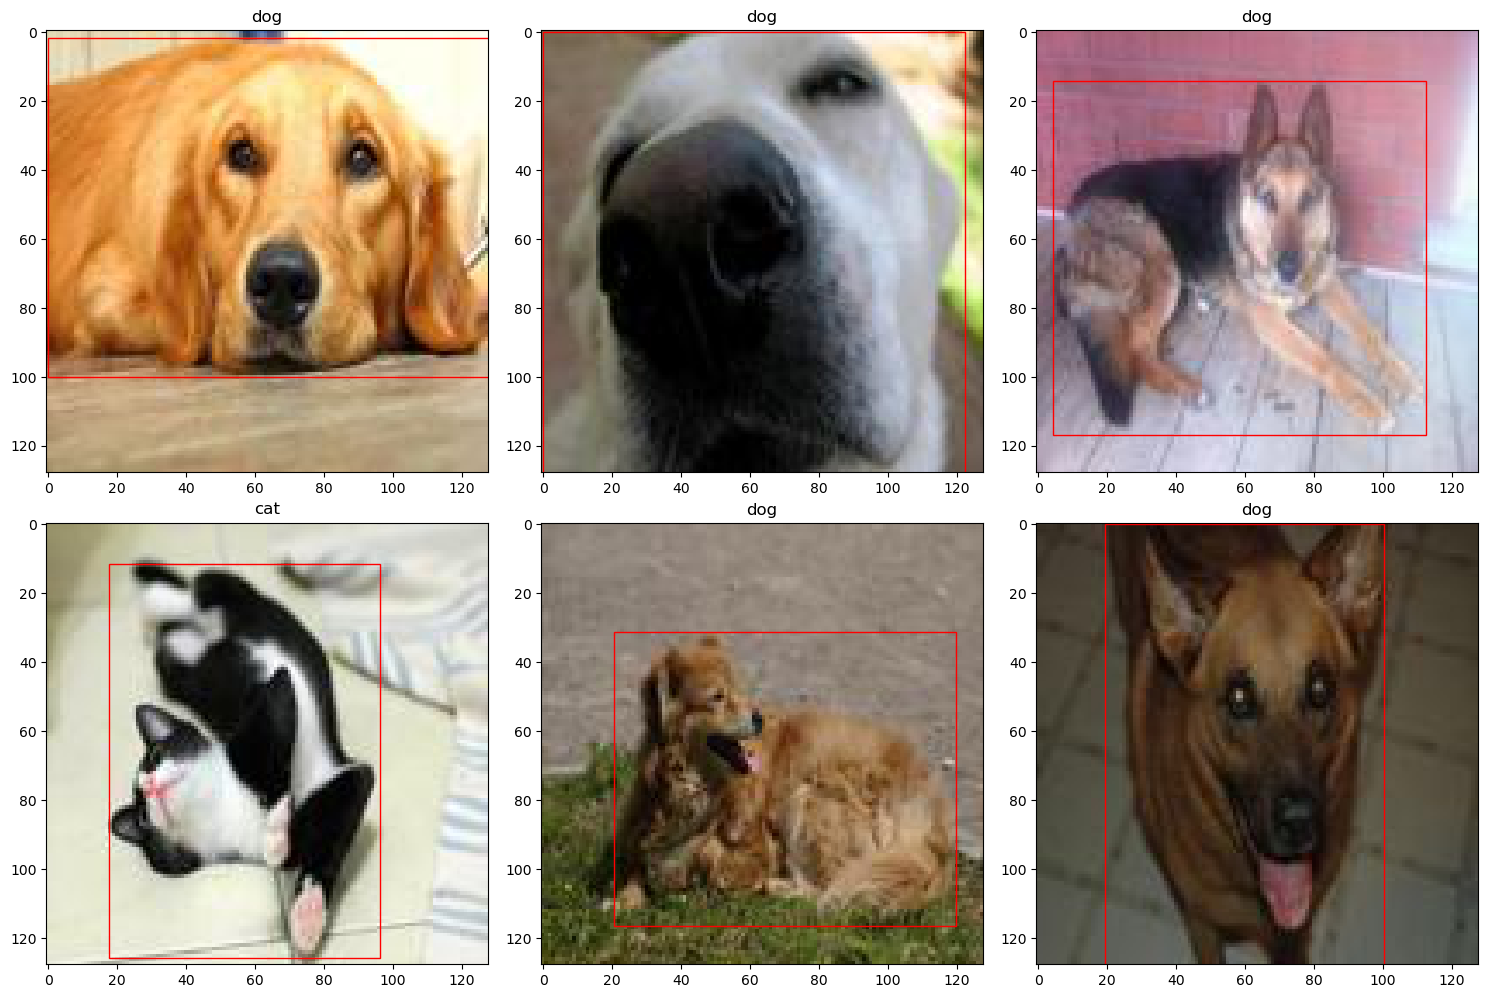

In [28]:
# plot random 6 images
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False,figsize=(15,10))
ax = ax.flatten()

for i,j in enumerate(np.random.choice(df.shape[0], size=6, replace=False)):
    img = mpimg.imread(path+'/resized/'+df.ImageID.values[j]+'.jpg')
    h, w = img.shape[:2]
    coords = df.iloc[j,4:8]
    ax[i].imshow(img)
    ax[i].set_title(df.iloc[j,2])
    ax[i].add_patch(plt.Rectangle((coords[0]*w, coords[2]*h), 
                                  coords[1]*w-coords[0]*w, coords[3]*h-coords[2]*h, 
                                  edgecolor='red', facecolor='none'))

plt.tight_layout()
plt.show()

In [29]:
# encode labels
df['Label'] = (df.LabelName == 'dog').astype(np.uint8)

Plot data to show how resizing normalizes the distribution

  0%|          | 0/12966 [00:00<?, ?it/s]

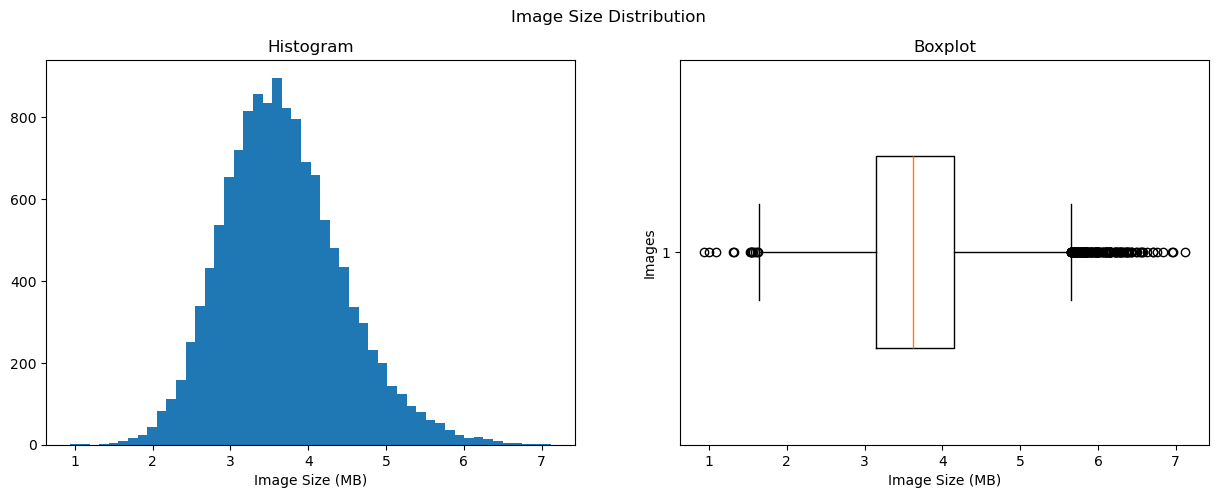

In [30]:
path1 = '../images/resized'
img_shape1 = []
img_size1 = np.zeros((df.shape[0], 1))

for i,f in enumerate(tqdm(glob.glob1(path1, '*.jpg'))):
    file = path1+'/'+f
    img = Image.open(file)
    img_shape1.append(f"{img.size[0]}x{img.size[1]}")
    img_size1[i] += os.path.getsize(file)


img_shape1_count = Counter(img_shape1)
# create a dataframe for image shapes
img_df1 = pd.DataFrame(set(img_shape1_count.items()), columns=['img_shape','img_count'])
img_size1 = img_size1 / 1000

fig, ax = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Image Size Distribution')
ax[0].hist(img_size1, bins=50)
ax[0].set_title('Histogram')
ax[0].set_xlabel('Image Size (MB)')
ax[1].boxplot(img_size1, vert=False, widths=0.5)
ax[1].set_title('Boxplot')
ax[1].set_xlabel('Image Size (MB)')
ax[1].set_ylabel('Images')
plt.show()

## Checkpoint and Save data

In [31]:
mkdir -p data

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file data already exists.
Error occurred while processing: data.


In [32]:
np.save('data/img.npy', img_arr.astype(np.uint8))
np.save('data/y_label.npy', df.Label.values)
np.save('data/y_bbox.npy', df[['XMin', 'YMin', 'XMax', 'YMax']].values.astype(np.float32))

# Baseline Models

## Load data

In [33]:
X = np.load('data/img.npy', allow_pickle=True)
y_label = np.load('data/y_label.npy', allow_pickle=True)
y_bbox = np.load('data/y_bbox.npy', allow_pickle=True)

In [34]:
idx_to_label = {1:'dog', 0:'cat'} # encoder

Double check that it loaded correctly

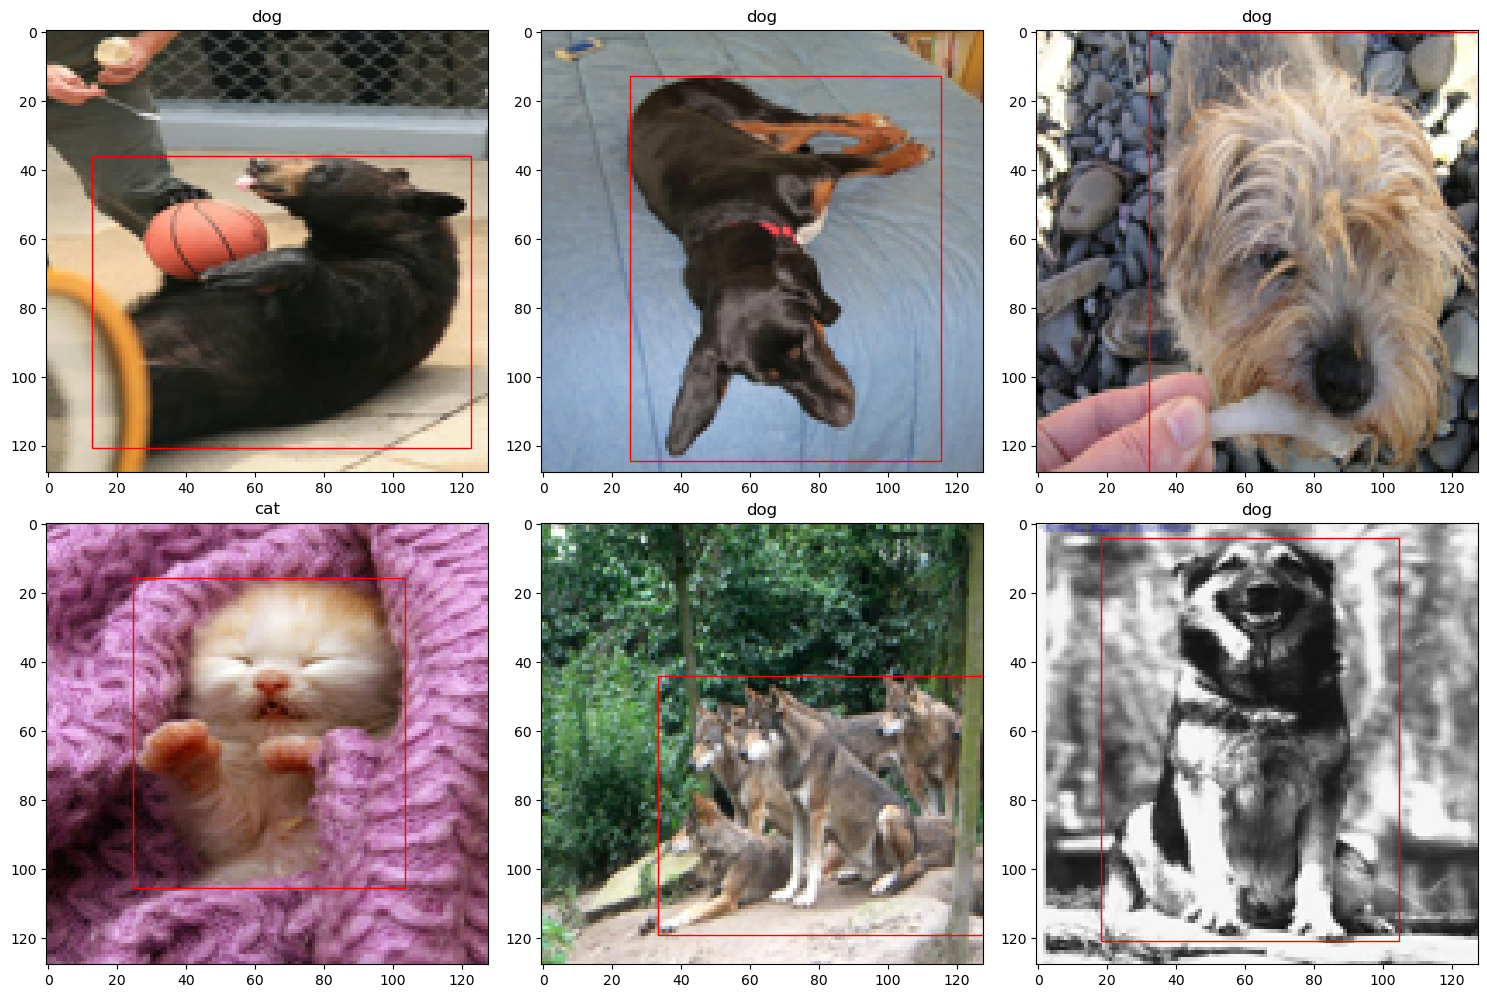

In [35]:
# plot random 6 images
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False,figsize=(15,10))
ax = ax.flatten()

for i,j in enumerate(np.random.choice(X.shape[0], size=6, replace=False)):
    coords = y_bbox[j] * 128
    ax[i].imshow(X[j].reshape(128,128,3))
    ax[i].set_title(idx_to_label[y_label[j]])
    ax[i].add_patch(plt.Rectangle((coords[0], coords[1]), 
                                  coords[2]-coords[0], coords[3]-coords[1], 
                                  edgecolor='red', facecolor='none'))

plt.tight_layout()
plt.show()

## Classification

### Split data

Create training and testing sets to avoid data leakage

In [36]:
X_train, X_test, y_train, y_test_label = train_test_split(X, y_label, test_size=0.01, random_state=27)

### Train

I'm choosing `SGDClassifier` because the data is large and I want to be able to perform stochastic gradient descent and also its ability to early stop. With this many parameters, a model can easily overfit so it's important to try and find the point of where it begins to overfit and stop for optimal results.

In [37]:
%%time
model1 = SGDClassifier(loss='log', n_jobs=-1, random_state=27, learning_rate='adaptive', eta0=1e-10, 
                      early_stopping=True, validation_fraction=0.2, n_iter_no_change=3)
# 0.2 validation TODO
model1.fit(X_train, y_train)

C:\Users\postw\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


CPU times: total: 6.45 s
Wall time: 23.3 s


SGDClassifier(early_stopping=True, eta0=1e-10, learning_rate='adaptive',
              loss='log', n_iter_no_change=3, n_jobs=-1, random_state=27,
              validation_fraction=0.2)

In [38]:
model1.n_iter_

9

Did it stop too early? Let's retrain with a few more iterations to see. Note that `SGDClassifier` has a parameter called `validation_fraction` which splits a validation set from the training data to determine when it stops.

In [39]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=27)

In [40]:
model2 = SGDClassifier(loss='log', n_jobs=-1, random_state=27, learning_rate='adaptive', eta0=1e-10)

epochs = 30

train_acc = np.zeros(epochs)
valid_acc = np.zeros(epochs)
for i in tqdm(range(epochs)):
    model2.partial_fit(X_train, y_train, np.unique(y_train))
    
    #log
    train_acc[i] += np.round(accuracy_score(y_train, model2.predict(X_train)),3)
    valid_acc[i] += np.round(accuracy_score(y_valid, model2.predict(X_valid)),3)

  0%|          | 0/30 [00:00<?, ?it/s]

C:\Users\postw\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


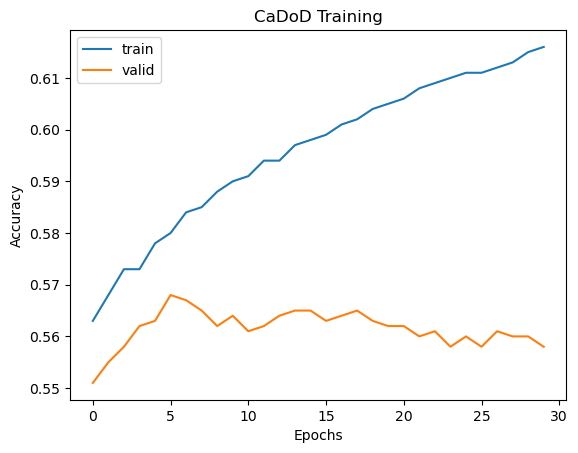

In [41]:
plt.plot(train_acc, label='train')
plt.plot(valid_acc, label='valid')
plt.title('CaDoD Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
del model2

### Evaluation

In [43]:
expLog = pd.DataFrame(columns=["exp_name", 
                               "Train Acc", 
                               "Valid Acc",
                               "Test  Acc",
                               "Train MSE", 
                               "Valid MSE",
                               "Test  MSE",
                              ])

In [44]:
exp_name = "Baseline: Linear Model (SGD Log Loss)"
accuracy_scores = [
    np.round(accuracy_score(y_train, model1.predict(X_train)), 3),
    np.round(accuracy_score(y_valid, model1.predict(X_valid)), 3),
    np.round(accuracy_score(y_test_label, model1.predict(X_test)), 3)
]
log_entry = [exp_name] + accuracy_scores + ['']

# Ensure 'expLogClass' DataFrame exists and has the correct structure
column_names = ['Experiment Name', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy', 'Description']
if 'expLogClass' not in locals():
    expLogClass = pd.DataFrame(columns=column_names)
else:
    # If 'expLogClass' exists but has a different structure, adjust it accordingly
    expLogClass = expLogClass.reindex(columns=column_names, fill_value=np.nan)
new_index = len(expLogClass)
expLogClass.loc[new_index] = log_entry  # Use .loc[new_index] to avoid the mismatch error


In [45]:
expLogClass

Experiment Name  Train Accuracy  Validation Accuracy  \
0  Baseline: Linear Model (SGD Log Loss)           0.585                0.587   

   Test Accuracy Description  
0          0.577

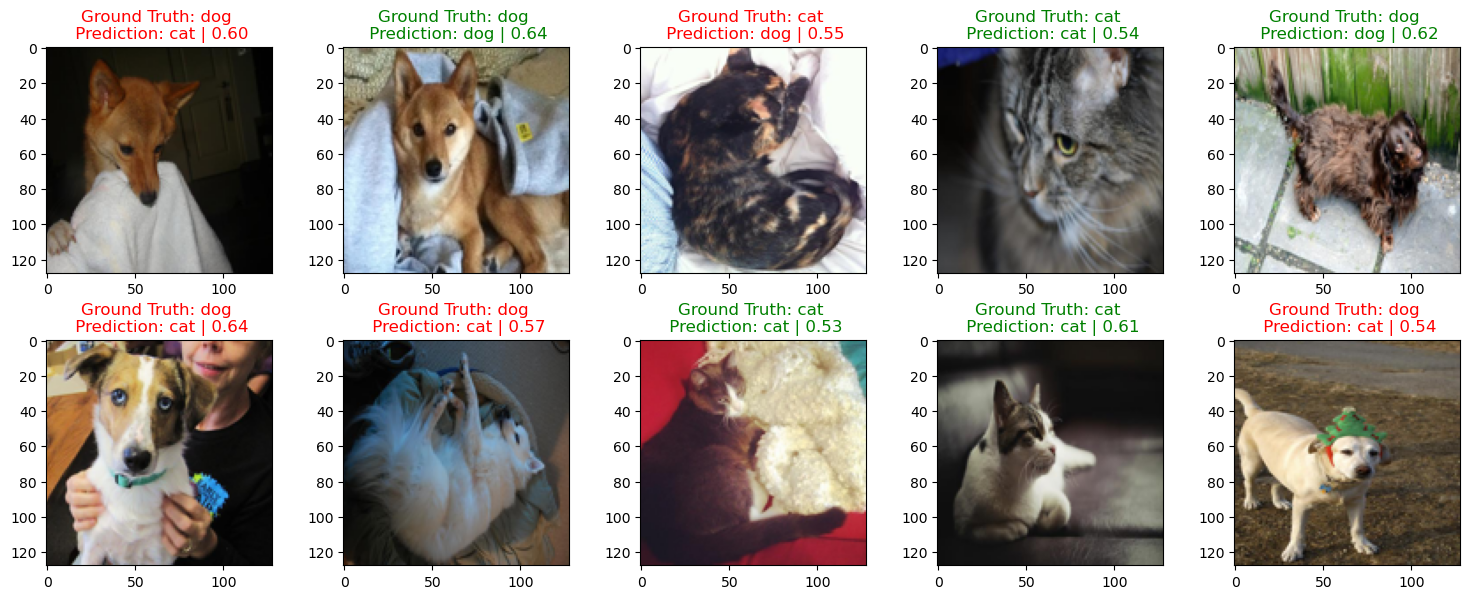

In [46]:
y_pred_label = model1.predict(X_test)
y_pred_label_proba = model1.predict_proba(X_test)

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=False, sharey=False,figsize=(15,6))
ax = ax.flatten()

for i in range(10):
    img = X_test[i].reshape(128,128,3)
    ax[i].imshow(img)
    ax[i].set_title("Ground Truth: {0} \n Prediction: {1} | {2:.2f}".format(idx_to_label[y_test_label[i]],
                                                                   idx_to_label[y_pred_label[i]],
                                                                   y_pred_label_proba[i][y_pred_label[i]]),
                   color=("green" if y_pred_label[i]==y_test_label[i] else "red"))

plt.tight_layout()
plt.show()

## Regression with multiple targets $[y_1, y_2, y_3, y_4]$

Train a linear regression model on multiple target values $[y_1, y_2, y_3, y_4]$ corresponding to [x, y, w, h] of the bounding box containing the object of interest. For more details see [SKLearn's manpage on LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

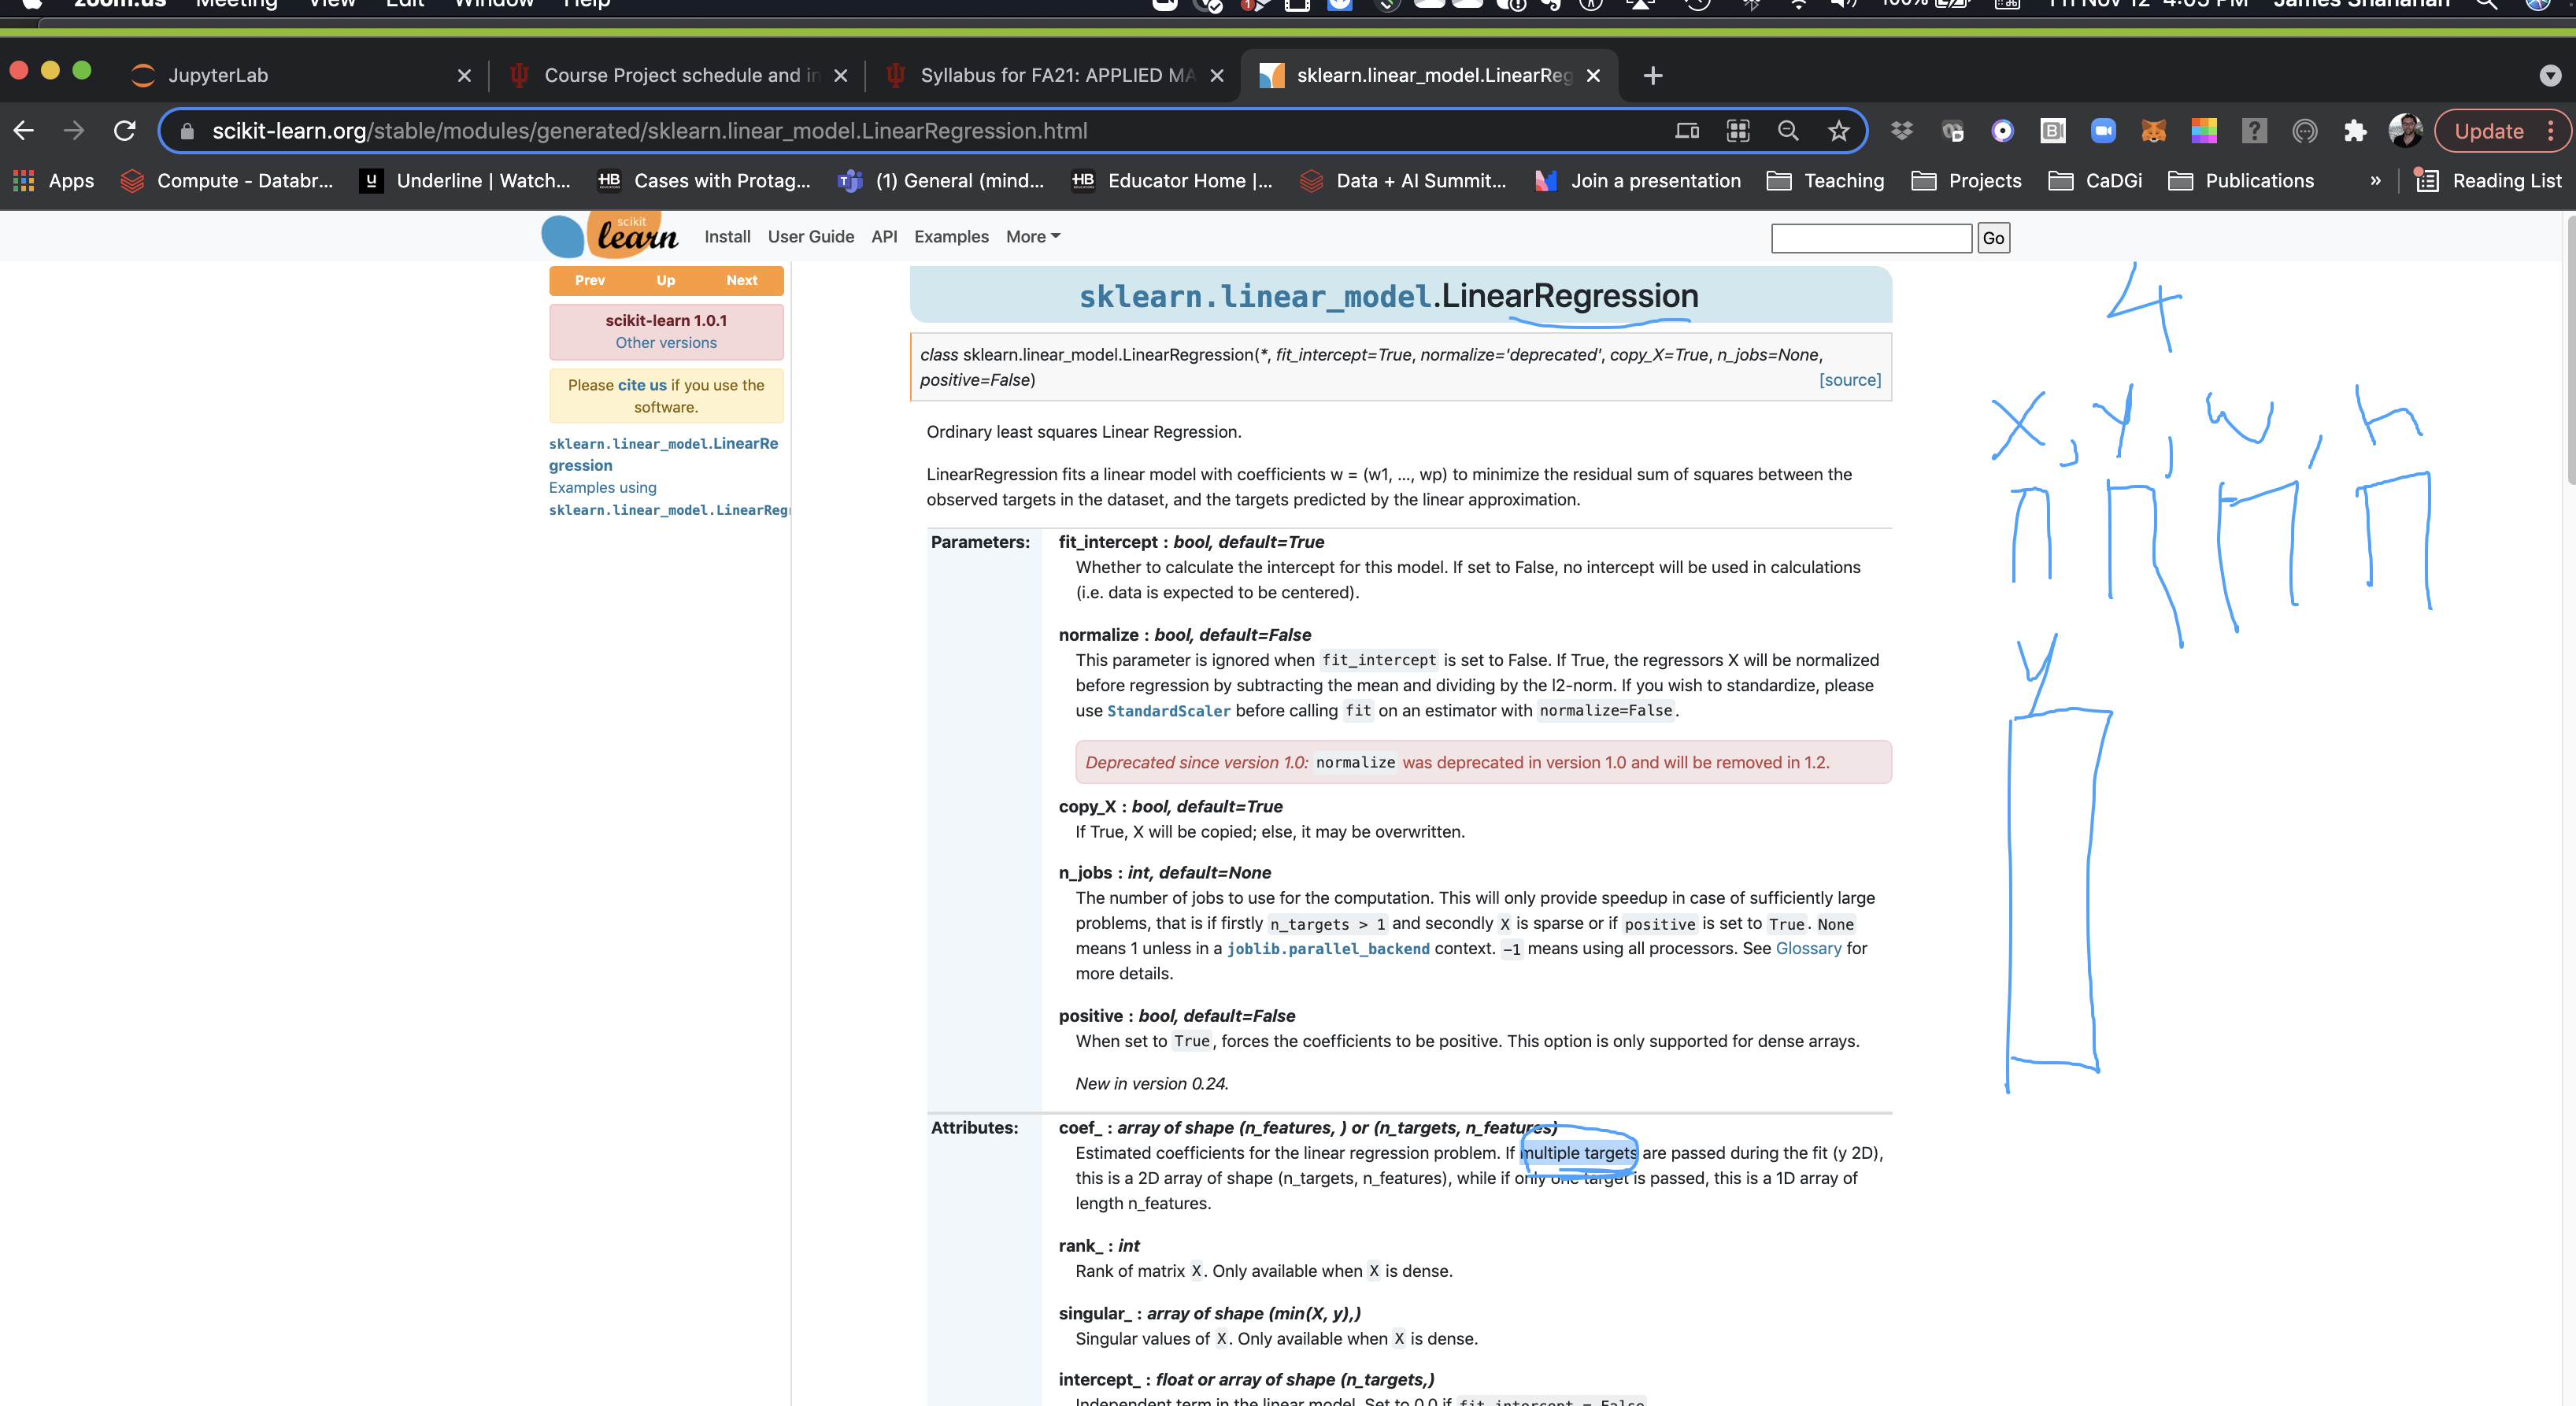### Split data

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y_bbox, test_size=0.01, random_state=27)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=27)

### Train

In [48]:
%%time

from sklearn.linear_model import LinearRegression, Lasso, Ridge
# TODO closed loop solution, could use Lasso Ridge
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)

# might take a few minutes to train
#CPU times: user 1h 26min 40s, sys: 5min 53s, total: 1h 32min 34s
#Wall time: 17min 24s

CPU times: total: 24min 2s
Wall time: 5min 29s


LinearRegression(n_jobs=-1)

### Evaluation

In [49]:
exp_name_mse = "Baseline: Linear Regression Model"
mse_scores = [
    np.round(mean_squared_error(y_train, model.predict(X_train)), 3),
    np.round(mean_squared_error(y_valid, model.predict(X_valid)), 3),
    np.round(mean_squared_error(y_test, model.predict(X_test)), 3)
]
log_entry = [exp_name_mse] + mse_scores + ['']

# Ensure 'expLogReg' DataFrame exists and has the correct structure
column_names = ['Experiment Name', 'Train MSE', 'Validation MSE', 'Test MSE', 'Description']

# We initialize the expLogReg dataframe here
expLogReg = pd.DataFrame(columns=column_names)
# If 'expLogReg' exists but has a different structure, adjust it accordingly
expLogReg = expLogReg.reindex(columns=column_names, fill_value=np.nan)
new_index = len(expLogReg)
expLogReg.loc[new_index] = log_entry 
expLogReg

Experiment Name  Train MSE  Validation MSE  Test MSE  \
0  Baseline: Linear Regression Model        0.0           0.036     0.035   

  Description  
0

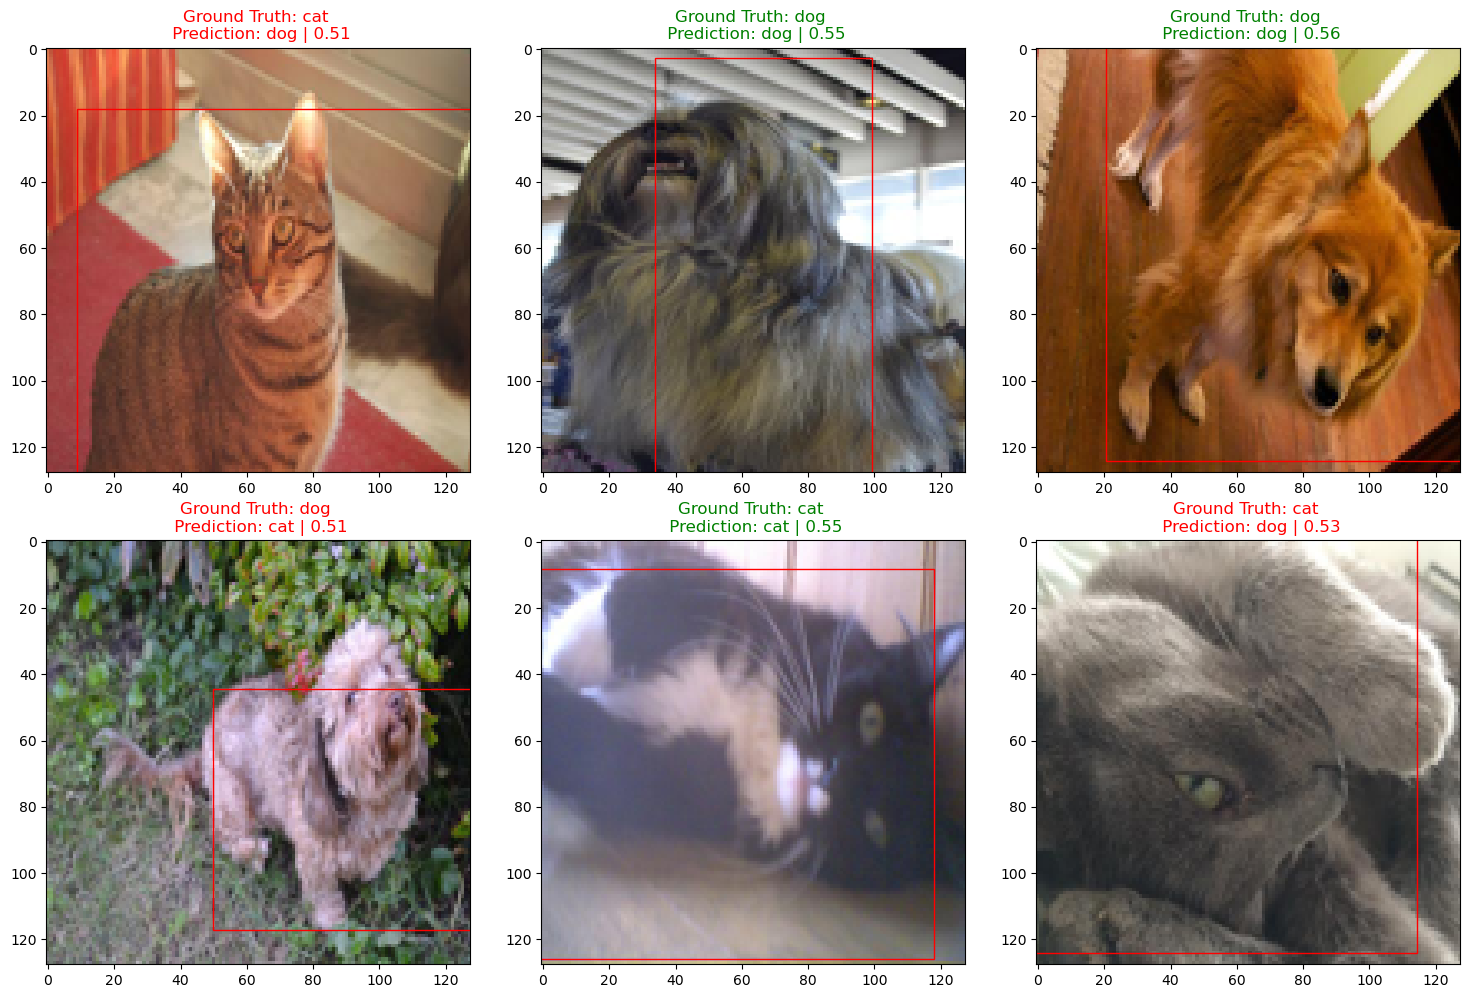

In [50]:
y_pred_bbox = model.predict(X_test)

fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False,figsize=(15,10))
ax = ax.flatten()

for i,j in enumerate(np.random.choice(X_test.shape[0], size=6, replace=False)):
    img = X_test[j].reshape(128,128,3)
    coords = y_pred_bbox[j] * 128
    ax[i].imshow(img)
    ax[i].set_title("Ground Truth: {0} \n Prediction: {1} | {2:.2f}".format(idx_to_label[y_test_label[j]],
                                                                   idx_to_label[y_pred_label[j]],
                                                                   y_pred_label_proba[j][y_pred_label[j]]),
                   color=("green" if y_pred_label[j]==y_test_label[j] else "red"))
    ax[i].add_patch(plt.Rectangle((coords[0], coords[1]), 
                                  coords[2]-coords[0], coords[3]-coords[1], 
                                  edgecolor='red', facecolor='none'))

plt.tight_layout()
plt.show()

# MLP Models

We will be building MLP models to perform image classification and regression using PyTorch and Torchvision.

We will then be comparing the MLP models with the baseline SGDClassifier and Linear Regression models created in the previous phase.

We import Pytorch and torchvision to build the models, and some sklearn classes to perform normalization.

In [51]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import Dataset, DataLoader, TensorDataset

from sklearn.preprocessing import StandardScaler

## Normalization
We first perform z-score normlization by subtracting each image by the train and test dataset mean and dividing by the standard deviation of the corresponding dataset. Z-score normalization is used to standardize the pixel values so that they have a mean of 0 and a standard deviation of 1.

In [52]:
# Flatten the images to compute mean and std
X_flattened = X.reshape(-1, X.shape[-1])

# Compute mean and std before normalization
mean_before = np.mean(X_flattened)
std_before = np.std(X_flattened)

print(f"Mean before normalization: {mean_before}")
print(f"Standard deviation before normalization: {std_before}")

Mean before normalization: 108.47303526171915
Standard deviation before normalization: 70.35824559103014


In [53]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the entire dataset
X_scaled = scaler.fit_transform(X_flattened).reshape(X.shape)

# Flatten the scaled images to compute mean and std
X_scaled_flattened = X_scaled.reshape(-1, X_scaled.shape[-1])

# Compute mean and std after normalization
mean_after = np.mean(X_scaled_flattened)
std_after = np.std(X_scaled_flattened)

print(f"\nMean after normalization: {mean_after}")
print(f"Standard deviation after normalization: {std_after}")


Mean after normalization: 6.074002824579145e-17
Standard deviation after normalization: 0.9999999999999969


## Data Splitting and Data Loading
We split the data into 1% testing data and 99% training data. We then use 10% of the training data as the validation set.

In [54]:
# 20% train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_label, test_size=0.01, random_state=27)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [55]:
print(f'Number of training samples: {len(X_train)}')
print(f'Number of validation samples: {len(X_val)}')
print(f'Number of testing samples: {len(X_test)}')

print(X_train[0])

Number of training samples: 11552
Number of validation samples: 1284
Number of testing samples: 130
[1.54278891 1.80062138 1.99893775 ... 0.57402656 0.74169861 0.79023272]


In [56]:
# Convert NumPy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

print(X_train[0])

tensor([1.5428, 1.8006, 1.9989,  ..., 0.5740, 0.7417, 0.7902])


We set a random seed for Numpy, Python and Pytorch to reproduce results.

In [57]:
set_seed = 1234

np.random.seed(set_seed)
torch.cuda.manual_seed(set_seed)
torch.manual_seed(set_seed)
torch.backends.cudnn.deterministic = True

Load data in Pytorch by creating a custom dataset and using Pytorch Dataloader class.

In [58]:
# Create custom datasets
class CustomDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        return self.images[index], self.labels[index]

# Create datasets
train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)
test_dataset = CustomDataset(X_test, y_test)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## MLP Model for Image Classification

In [59]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 100)
        self.fc3 = nn.Linear(100, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [60]:
# Define the dimensions
input_dim = X_train.shape[1]
hidden_dim = 250 
output_dim = 2

To train the model, we use the Adam optimization algorithm as it uses both momentum and scaling to have the benefits of SGD and RMSProp. We also use CrossEntropyLoss, which is a good loss function for classification tasks. We try out different number of hidden layer dimensions and learning rates to see which gives the best performance. All MLP models have 2 hidden layers and ReLU is applied after each linear transformation.

In [61]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define different hyperparameters
hyperparams_list = [
    {'hidden_dim': 64, 'lr': 0.001},
    {'hidden_dim': 128, 'lr': 0.001},
    {'hidden_dim': 128, 'lr': 0.0001},
    {'hidden_dim': 256, 'lr': 0.001},
    {'hidden_dim': 256, 'lr': 0.0001}
]

# Set number of epochs
epochs = 10

# Store the cross-validation accuracy for each case
cv_accs = []
train_accs = []
test_accs = []

for i, hyperparams in enumerate(hyperparams_list):
    print(f"Running case {i+1}: {hyperparams}")
    
    # Initialize the model
    model = MLP(input_dim, hyperparams['hidden_dim'], output_dim)
    
    # Define the optimizer with the specified learning rate and loss function
    optimizer = optim.Adam(model.parameters(), lr=hyperparams['lr'])
    criterion = nn.CrossEntropyLoss()
    
    # Define lists to store train and validation accuracies for plotting
    train_acc_list = []
    val_acc_list = []

    # Training loop
    for epoch in range(epochs):
        # Training
        model.train()
        train_acc = 0.0
        train_loss = 0.0  # Initialize training loss
        
        for images, labels in train_loader:
            images = images.view(images.size(0), -1)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()  # Accumulate training loss
            _, predicted = torch.max(outputs, 1)
            train_acc += (predicted == labels).sum().item() / labels.size(0)
        
        train_loss /= len(train_loader)  # Calculate average training loss
        train_acc /= len(train_loader)
        train_acc_list.append(train_acc)

        # Validation
        model.eval()
        val_acc = 0.0
        val_loss = 0.0  # Initialize validation loss
        
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.view(images.size(0), -1)
                outputs = model(images)
                loss = criterion(outputs, labels.long())
                val_loss += loss.item()  # Accumulate validation loss
                _, predicted = torch.max(outputs, 1)
                val_acc += (predicted == labels).sum().item() / labels.size(0)
        
        val_loss /= len(val_loader)  # Calculate average validation loss
        val_acc /= len(val_loader)
        val_acc_list.append(val_acc)
        
        print(f"Epoch {epoch+1}/{epochs}:")
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    
    # Store the validation accuracies for plotting
    cv_accs.append(val_acc_list) 
    train_accs.append(train_acc_list)

    # Compute test accuracy on X_test
    test_acc_test = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(images.size(0), -1)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            test_acc_test += (predicted == labels).sum().item() / labels.size(0)
    
    test_acc_test /= len(test_loader)
    print(f"Test Accuracy on X_test: {test_acc_test:.4f}")
    test_accs.append(test_acc_test)

    # Save the trained model
    model_path = f"model_{i+1}.pth"
    torch.save(model.state_dict(), model_path)
    print(f"Saved model to {model_path}")

Running case 1: {'hidden_dim': 64, 'lr': 0.001}
Epoch 1/10:
Train Loss: 1.1575, Train Acc: 0.5340
Val Loss: 0.9140, Val Acc: 0.5694
Epoch 2/10:
Train Loss: 0.7477, Train Acc: 0.5810
Val Loss: 0.7194, Val Acc: 0.5556
Epoch 3/10:
Train Loss: 0.6670, Train Acc: 0.6165
Val Loss: 0.7352, Val Acc: 0.5381
Epoch 4/10:
Train Loss: 0.6415, Train Acc: 0.6436
Val Loss: 0.7413, Val Acc: 0.5518
Epoch 5/10:
Train Loss: 0.6123, Train Acc: 0.6714
Val Loss: 0.7407, Val Acc: 0.5655
Epoch 6/10:
Train Loss: 0.5956, Train Acc: 0.6827
Val Loss: 0.7734, Val Acc: 0.5267
Epoch 7/10:
Train Loss: 0.5821, Train Acc: 0.7014
Val Loss: 0.7642, Val Acc: 0.5884
Epoch 8/10:
Train Loss: 0.5608, Train Acc: 0.7170
Val Loss: 0.8131, Val Acc: 0.5495
Epoch 9/10:
Train Loss: 0.5294, Train Acc: 0.7375
Val Loss: 0.8155, Val Acc: 0.5724
Epoch 10/10:
Train Loss: 0.4999, Train Acc: 0.7587
Val Loss: 0.8939, Val Acc: 0.5747
Test Accuracy on X_test: 0.5062
Saved model to model_1.pth
Running case 2: {'hidden_dim': 128, 'lr': 0.001}
Epo

It seems the MLP model doesn't do well to learn the necessary features to classify images, as the training accuracy seems to increase but the validation accuracy doesn't seem to increase with it. It seems MLP is very prone to overfitting.

In [62]:
# Initialize DataFrame if not exists
column_names = ['Experiment Name', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy', 'Description']
if 'expLogClass' not in locals():
    expLogClass = pd.DataFrame(columns=column_names)
else:
    expLogClass = expLogClass.reindex(columns=column_names, fill_value=np.nan)

descriptions = []

# Log results for each MLP model
for i, hyperparams in enumerate(hyperparams_list):
    val_acc = cv_accs[i][-1]
    train_acc = train_accs[i][-1]
    
    # Define model name and descriptions
    model_name = f"MLP Model {i+1}"
    description = f"hidden_dim: {hyperparams['hidden_dim']}, lr: {hyperparams['lr']}"
    descriptions.append(description)
    
    test_acc = np.round(test_accs[i], 3)  # Get test accuracy from test_accs list
    
    # Create log entry
    log_entry = [model_name, train_acc, val_acc, test_acc, description]
    
    # Add log entry to DataFrame
    new_index = len(expLogClass)
    expLogClass.loc[new_index] = log_entry

# Display the updated expLogClass
expLogClass

Experiment Name  Train Accuracy  Validation Accuracy  \
0  Baseline: Linear Model (SGD Log Loss)        0.585000             0.587000   
1                            MLP Model 1        0.758657             0.574695   
2                            MLP Model 2        0.736323             0.562500   
3                            MLP Model 3        0.911530             0.557927   
4                            MLP Model 4        0.650364             0.571646   
5                            MLP Model 5        0.931440             0.567073   

   Test Accuracy                  Description  
0          0.577                               
1          0.506    hidden_dim: 64, lr: 0.001  
2          0.488   hidden_dim: 128, lr: 0.001  
3          0.462  hidden_dim: 128, lr: 0.0001  
4          0.538   hidden_dim: 256, lr: 0.001  
5          0.531  hidden_dim: 256, lr: 0.0001

The best performing MLP model has 256 hidden dimensions and a learning rate of 0.001 (with 2 hidden layers and ReLU activation function after each linear transformation in hidden layers), and it got a test accuracy of 53.8%, which is worse than our baseline Linear Model.

It seems as we increase the hidden layer dimensions, the test accuracy increases. Let's test out some more models with higher hidden layer dimensions.

In [64]:
# Define different hyperparameters
hyperparams_list = [
    {'hidden_dim': 512, 'lr': 0.001},
    {'hidden_dim': 1024, 'lr': 0.001},
    {'hidden_dim': 2042, 'lr': 0.001},
]

# Set number of epochs
epochs = 1

# Store the cross-validation accuracy for each case
cv_accs = []
train_accs = []
test_accs = []

for i, hyperparams in enumerate(hyperparams_list):
    print(f"Running case {i+1}: {hyperparams}")
    
    # Initialize the model
    model = MLP(input_dim, hyperparams['hidden_dim'], output_dim)
    
    # Define the optimizer with the specified learning rate and loss function
    optimizer = optim.Adam(model.parameters(), lr=hyperparams['lr'])
    criterion = nn.CrossEntropyLoss()
    
    # Define lists to store train and validation accuracies for plotting
    train_acc_list = []
    val_acc_list = []

    # Training loop
    for epoch in range(epochs):
        # Training
        model.train()
        train_acc = 0.0
        train_loss = 0.0  # Initialize training loss
        
        for images, labels in train_loader:
            images = images.view(images.size(0), -1)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()  # Accumulate training loss
            _, predicted = torch.max(outputs, 1)
            train_acc += (predicted == labels).sum().item() / labels.size(0)
        
        train_loss /= len(train_loader)  # Calculate average training loss
        train_acc /= len(train_loader)
        train_acc_list.append(train_acc)

        # Validation
        model.eval()
        val_acc = 0.0
        val_loss = 0.0  # Initialize validation loss
        
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.view(images.size(0), -1)
                outputs = model(images)
                loss = criterion(outputs, labels.long())
                val_loss += loss.item()  # Accumulate validation loss
                _, predicted = torch.max(outputs, 1)
                val_acc += (predicted == labels).sum().item() / labels.size(0)
        
        val_loss /= len(val_loader)  # Calculate average validation loss
        val_acc /= len(val_loader)
        val_acc_list.append(val_acc)
        
        print(f"Epoch {epoch+1}/{epochs}:")
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    
    # Store the validation accuracies for plotting
    cv_accs.append(val_acc_list) 
    train_accs.append(train_acc_list)

    # Compute test accuracy on X_test
    test_acc_test = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(images.size(0), -1)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            test_acc_test += (predicted == labels).sum().item() / labels.size(0)
    
    test_acc_test /= len(test_loader)
    print(f"Test Accuracy on X_test: {test_acc_test:.4f}")
    test_accs.append(test_acc_test)

    # Save the trained model
    model_path = f"modelClass_{i+6}.pth"
    torch.save(model.state_dict(), model_path)
    print(f"Saved model to {model_path}")

Running case 1: {'hidden_dim': 512, 'lr': 0.001}
Epoch 1/1:
Train Loss: 0.8988, Train Acc: 0.5235
Val Loss: 0.6885, Val Acc: 0.5221
Test Accuracy on X_test: 0.5875
Saved model to modelClass_6.pth
Running case 2: {'hidden_dim': 1024, 'lr': 0.001}
Epoch 1/1:
Train Loss: 0.8553, Train Acc: 0.5048
Val Loss: 0.6923, Val Acc: 0.5191
Test Accuracy on X_test: 0.6000
Saved model to modelClass_7.pth
Running case 3: {'hidden_dim': 2042, 'lr': 0.001}
Epoch 1/1:
Train Loss: 0.9183, Train Acc: 0.5286
Val Loss: 0.6925, Val Acc: 0.5191
Test Accuracy on X_test: 0.6000
Saved model to modelClass_8.pth


In [65]:
# Initialize DataFrame if not exists
column_names = ['Experiment Name', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy', 'Description']
if 'expLogClass' not in locals():
    expLogClass = pd.DataFrame(columns=column_names)
else:
    expLogClass = expLogClass.reindex(columns=column_names, fill_value=np.nan)

descriptions = []

# Log results for each MLP model
for i, hyperparams in enumerate(hyperparams_list):
    val_acc = cv_accs[i][-1]
    train_acc = train_accs[i][-1]
    
    # Define model name and descriptions
    model_name = f"MLP Model {i+6}"
    description = f"hidden_dim: {hyperparams['hidden_dim']}, lr: {hyperparams['lr']}"
    descriptions.append(description)
    
    test_acc = np.round(test_accs[i], 3)  # Get test accuracy from test_accs list
    
    # Create log entry
    log_entry = [model_name, train_acc, val_acc, test_acc, description]
    
    # Add log entry to DataFrame
    new_index = len(expLogClass)
    expLogClass.loc[new_index] = log_entry

# Display the updated expLogClass
expLogClass

Experiment Name  Train Accuracy  Validation Accuracy  \
0  Baseline: Linear Model (SGD Log Loss)        0.585000             0.587000   
1                            MLP Model 1        0.758657             0.574695   
2                            MLP Model 2        0.736323             0.562500   
3                            MLP Model 3        0.911530             0.557927   
4                            MLP Model 4        0.650364             0.571646   
5                            MLP Model 5        0.931440             0.567073   
6                            MLP Model 6        0.523459             0.522104   
7                            MLP Model 7        0.504761             0.519055   
8                            MLP Model 8        0.528566             0.519055   

   Test Accuracy                  Description  
0          0.577                               
1          0.506    hidden_dim: 64, lr: 0.001  
2          0.488   hidden_dim: 128, lr: 0.001  
3          0.462  hidden_dim: 128, lr: 0.0001  
4          0.538   hidden_dim: 256, lr: 0.001  
5          0.531  hidden_dim: 256, lr: 0.0001  
6          0.588   hidden_dim: 512, lr: 0.001  
7          0.600  hidden_dim: 1024, lr: 0.001  
8          0.600  hidden_dim: 2042, lr: 0.001

The best MLP classification model came out to be MLP Model 8, with hidden layer dimensions = 2042 and a learning rate of 0.001. It exceeds the baseline accuracy, yay!

## MLP Model for Regression

In [66]:
# Load data again
X = np.load('data/img.npy', allow_pickle=True)
y_label = np.load('data/y_label.npy', allow_pickle=True)
y_bbox = np.load('data/y_bbox.npy', allow_pickle=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_bbox, test_size=0.01, random_state=27)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=27)

We test different hidden layer dimension and learning rates for the MLP regression model as well, this time with number of epochs = 100 first and using MSE as the loss function along with Adam optimization. We then choose the best performing model and run it for 1500 epoch.

In [67]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 100)
        self.fc3 = nn.Linear(100, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_valid_tensor = torch.tensor(X_valid, dtype=torch.float32)
y_valid_tensor = torch.tensor(y_valid, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Hyperparameters
hyperparams_list = [
    {'hidden_dim': 64, 'lr': 0.001},
    {'hidden_dim': 128, 'lr': 0.001},
    {'hidden_dim': 128, 'lr': 0.0001},
    {'hidden_dim': 256, 'lr': 0.001},
    {'hidden_dim': 256, 'lr': 0.0001}
]

results = []

for hyperparams in hyperparams_list:
    print("Training model: " + str(hyperparams))
    # Initialize the model
    input_dim = X_train.shape[1]
    hidden_dim = hyperparams['hidden_dim']
    output_dim = y_train.shape[1]
    model = MLP(input_dim, hidden_dim, output_dim)

    # Define loss and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=hyperparams['lr'])

    # Training loop
    num_epochs = 100
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()

        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        if epoch == num_epochs - 1:  # Print the loss for the last epoch
            # Save the model
            model_path = f"modelReg{hidden_dim}_lr_{hyperparams['lr']}.pt"
            torch.save(model.state_dict(), model_path)
            
            # Evaluation
            model.eval()
            with torch.no_grad():
                train_outputs = model(X_train_tensor)
                train_loss = criterion(train_outputs, y_train_tensor)
                
                valid_outputs = model(X_valid_tensor)
                valid_loss = criterion(valid_outputs, y_valid_tensor)

                test_outputs = model(X_test_tensor)
                test_loss = criterion(test_outputs, y_test_tensor)

            
            results.append({
                'hidden_dim': hidden_dim,
                'lr': hyperparams['lr'],
                'train_mse': train_loss.item(),
                'valid_mse': valid_loss.item(),
                'test_mse': test_loss.item()
            })

            print(f"Hidden Dim: {hidden_dim}, LR: {hyperparams['lr']}, Epoch: {epoch + 1}/{num_epochs}, Train MSE: {train_loss.item():.4f}, Valid MSE: {valid_loss.item():.4f}, Test MSE: {test_loss.item():.4f}")
        else:
            # Validation
            model.eval()
            with torch.no_grad():
                valid_outputs = model(X_valid_tensor)
                valid_loss = criterion(valid_outputs, y_valid_tensor)
        
            print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {loss.item():.4f}, Valid Loss: {valid_loss.item():.4f}")


# Print final results
for result in results:
    print(f"Hidden Dim: {result['hidden_dim']}, LR: {result['lr']}, Train MSE: {result['train_mse']:.4f}, Valid MSE: {result['valid_mse']:.4f}, Test MSE: {result['test_mse']:.4f}")

Training model: {'hidden_dim': 64, 'lr': 0.001}
Epoch [1/100], Train Loss: 104.5679, Valid Loss: 824453.9375
Epoch [2/100], Train Loss: 816576.2500, Valid Loss: 361786.1250
Epoch [3/100], Train Loss: 357767.3438, Valid Loss: 182657.2031
Epoch [4/100], Train Loss: 180697.2188, Valid Loss: 55347.1445
Epoch [5/100], Train Loss: 54844.1016, Valid Loss: 57544.1680
Epoch [6/100], Train Loss: 57024.1172, Valid Loss: 40520.4102
Epoch [7/100], Train Loss: 40202.0430, Valid Loss: 30328.4199
Epoch [8/100], Train Loss: 30083.9004, Valid Loss: 16810.5449
Epoch [9/100], Train Loss: 16661.7812, Valid Loss: 23530.9180
Epoch [10/100], Train Loss: 23330.7812, Valid Loss: 22910.6074
Epoch [11/100], Train Loss: 22731.4004, Valid Loss: 12954.1133
Epoch [12/100], Train Loss: 12846.6611, Valid Loss: 10758.4844
Epoch [13/100], Train Loss: 10662.4443, Valid Loss: 17501.5195
Epoch [14/100], Train Loss: 17338.8125, Valid Loss: 18061.6699
Epoch [15/100], Train Loss: 17875.0312, Valid Loss: 10835.0186
Epoch [16/10

In [68]:
# Initialize DataFrame if not exists
column_names = ['Experiment Name', 'Train MSE', 'Validation MSE', 'Test MSE', 'Description']
if 'expLogReg' not in locals():
    expLogReg = pd.DataFrame(columns=column_names)
else:
    expLogReg = expLogReg.reindex(columns=column_names, fill_value=np.nan)

descriptions = []

# Log results for each MLP model
for i, result in enumerate(results):
    train_mse = result['train_mse']
    valid_mse = result['valid_mse']
    test_mse = result['test_mse']
    
    # Define experiment name and descriptions
    exp_name_mse = f"MLP Regression Model {i+1}"
    description = f"epochs: 100, hidden_dim: {result['hidden_dim']}, lr: {result['lr']}"
    descriptions.append(description)
    
    # Create log entry
    log_entry = [exp_name_mse, train_mse, valid_mse, test_mse, description]
    
    # Add log entry to DataFrame
    new_index = len(expLogReg)
    expLogReg.loc[new_index] = log_entry

# Display the updated expLogReg
expLogReg

Experiment Name  Train MSE  Validation MSE  Test MSE  \
0  Baseline: Linear Regression Model   0.000000        0.036000  0.035000   
1             MLP Regression Model 1   5.331316        5.573822  5.088965   
2             MLP Regression Model 2   2.758085        2.818288  2.392886   
3             MLP Regression Model 3   2.078548        2.178573  2.488529   
4             MLP Regression Model 4   3.383973        3.527435  3.348979   
5             MLP Regression Model 5   2.343070        2.335040  2.206447   

                                Description  
0                                            
1    epochs: 100, hidden_dim: 64, lr: 0.001  
2   epochs: 100, hidden_dim: 128, lr: 0.001  
3  epochs: 100, hidden_dim: 128, lr: 0.0001  
4   epochs: 100, hidden_dim: 256, lr: 0.001  
5  epochs: 100, hidden_dim: 256, lr: 0.0001

In [70]:
# Choosing best model and running it with 1500 epochs
# Hyperparameters
hyperparams_list = [
    {'hidden_dim': 256, 'lr': 0.0001}
]

results = []

for hyperparams in hyperparams_list:
    print("Training model: " + str(hyperparams))
    # Initialize the model
    input_dim = X_train.shape[1]
    hidden_dim = hyperparams['hidden_dim']
    output_dim = y_train.shape[1]
    model = MLP(input_dim, hidden_dim, output_dim)

    # Define loss and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=hyperparams['lr'])

    # Training loop
    num_epochs = 1000
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()

        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        if epoch == num_epochs - 1:  # Print the loss for the last epoch
            # Save the model
            model_path = f"modelReg{hidden_dim}_lr_{hyperparams['lr']}.pt"
            torch.save(model.state_dict(), model_path)
            
            # Evaluation
            model.eval()
            with torch.no_grad():
                train_outputs = model(X_train_tensor)
                train_loss = criterion(train_outputs, y_train_tensor)
                
                valid_outputs = model(X_valid_tensor)
                valid_loss = criterion(valid_outputs, y_valid_tensor)

                test_outputs = model(X_test_tensor)
                test_loss = criterion(test_outputs, y_test_tensor)

            
            results.append({
                'hidden_dim': hidden_dim,
                'lr': hyperparams['lr'],
                'train_mse': train_loss.item(),
                'valid_mse': valid_loss.item(),
                'test_mse': test_loss.item()
            })

            print(f"Hidden Dim: {hidden_dim}, LR: {hyperparams['lr']}, Epoch: {epoch + 1}/{num_epochs}, Train MSE: {train_loss.item():.4f}, Valid MSE: {valid_loss.item():.4f}, Test MSE: {test_loss.item():.4f}")
        else:
            # Validation
            model.eval()
            with torch.no_grad():
                valid_outputs = model(X_valid_tensor)
                valid_loss = criterion(valid_outputs, y_valid_tensor)
        
            print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {loss.item():.4f}, Valid Loss: {valid_loss.item():.4f}")


# Print final results
for result in results:
    print(f"Hidden Dim: {result['hidden_dim']}, LR: {result['lr']}, Train MSE: {result['train_mse']:.4f}, Valid MSE: {result['valid_mse']:.4f}, Test MSE: {result['test_mse']:.4f}")

Training model: {'hidden_dim': 256, 'lr': 0.0001}
Epoch [1/1000], Train Loss: 188.1219, Valid Loss: 31654.4355
Epoch [2/1000], Train Loss: 31304.6074, Valid Loss: 6276.4990
Epoch [3/1000], Train Loss: 6258.7368, Valid Loss: 1811.9482
Epoch [4/1000], Train Loss: 1801.8444, Valid Loss: 466.2540
Epoch [5/1000], Train Loss: 457.6519, Valid Loss: 1654.2415
Epoch [6/1000], Train Loss: 1634.6117, Valid Loss: 1791.7546
Epoch [7/1000], Train Loss: 1773.2214, Valid Loss: 730.5060
Epoch [8/1000], Train Loss: 722.7507, Valid Loss: 388.0604
Epoch [9/1000], Train Loss: 386.7148, Valid Loss: 647.1725
Epoch [10/1000], Train Loss: 643.7868, Valid Loss: 588.4763
Epoch [11/1000], Train Loss: 583.9746, Valid Loss: 293.3027
Epoch [12/1000], Train Loss: 290.8362, Valid Loss: 295.9475
Epoch [13/1000], Train Loss: 293.3755, Valid Loss: 449.5615
Epoch [14/1000], Train Loss: 445.5333, Valid Loss: 361.7007
Epoch [15/1000], Train Loss: 358.7917, Valid Loss: 173.0240
Epoch [16/1000], Train Loss: 172.1146, Valid Lo

In [71]:
# Initialize DataFrame if not exists
column_names = ['Experiment Name', 'Train MSE', 'Validation MSE', 'Test MSE', 'Description']
if 'expLogReg' not in locals():
    expLogReg = pd.DataFrame(columns=column_names)
else:
    expLogReg = expLogReg.reindex(columns=column_names, fill_value=np.nan)

descriptions = []

# Log results for each MLP model
for i, result in enumerate(results):
    train_mse = result['train_mse']
    valid_mse = result['valid_mse']
    test_mse = result['test_mse']
    
    # Define experiment name and descriptions
    exp_name_mse = f"MLP Regression Model (best)"
    description = f"epochs: 1000, hidden_dim: {result['hidden_dim']}, lr: {result['lr']}"
    descriptions.append(description)
    
    # Create log entry
    log_entry = [exp_name_mse, train_mse, valid_mse, test_mse, description]
    
    # Add log entry to DataFrame
    new_index = len(expLogReg)
    expLogReg.loc[new_index] = log_entry

# Display the updated expLogReg
expLogReg

Experiment Name  Train MSE  Validation MSE  Test MSE  \
0  Baseline: Linear Regression Model   0.000000        0.036000  0.035000   
1             MLP Regression Model 1   5.331316        5.573822  5.088965   
2             MLP Regression Model 2   2.758085        2.818288  2.392886   
3             MLP Regression Model 3   2.078548        2.178573  2.488529   
4             MLP Regression Model 4   3.383973        3.527435  3.348979   
5             MLP Regression Model 5   2.343070        2.335040  2.206447   
6        MLP Regression Model (best)   0.431990        0.499469  0.550396   

                                 Description  
0                                             
1     epochs: 100, hidden_dim: 64, lr: 0.001  
2    epochs: 100, hidden_dim: 128, lr: 0.001  
3   epochs: 100, hidden_dim: 128, lr: 0.0001  
4    epochs: 100, hidden_dim: 256, lr: 0.001  
5   epochs: 100, hidden_dim: 256, lr: 0.0001  
6  epochs: 1000, hidden_dim: 256, lr: 0.0001

As we can see from the results above, the  test MSE of 0.55 is obtained from the MLP regression model with hidden layer dimensions = 256 and learning rate of 0.0001. Interestingly, it is still not better than the Linear Regression model. However, since increase number of epochs decreases MSE, it would be interesting to see how the model performs with higher epoch numbers. 

## Multi-headed cat/dog detector using with multi-task loss function

We create a multi-headed model with CXE + MSE using OOP API in Pytorch

Set up pytorch dataset for multi-headed cat/dog detector and run multi headed cat/dog detector with multiple models

Our models run for 30 epoch each with a batch size of 500.



In [100]:
X = np.load('data/img.npy', allow_pickle=True)
y_label = np.load('data/y_label.npy', allow_pickle=True)
y_bbox = np.load('data/y_bbox.npy', allow_pickle=True)

# Split data
X_train, X_test, y_label_train, y_label_test, y_bbox_train, y_bbox_test = train_test_split(
    X, y_label, y_bbox, test_size=0.2, random_state=42
)
X_train, X_valid, y_label_train, y_label_valid, y_bbox_train, y_bbox_valid = train_test_split(
    X_train, y_label_train, y_bbox_train, test_size=0.1, random_state=42
)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_valid_tensor = torch.tensor(X_valid, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_label_train_tensor = torch.tensor(y_label_train, dtype=torch.long)
y_label_valid_tensor = torch.tensor(y_label_valid, dtype=torch.long)
y_label_test_tensor = torch.tensor(y_label_test, dtype=torch.long)
y_bbox_train_tensor = torch.tensor(y_bbox_train, dtype=torch.float32)
y_bbox_valid_tensor = torch.tensor(y_bbox_valid, dtype=torch.float32)
y_bbox_test_tensor = torch.tensor(y_bbox_test, dtype=torch.float32)

# Define the Multi-Headed Model
class MultiHeadedModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim_cls, output_dim_reg):
        super(MultiHeadedModel, self).__init__()
        
        # Classification MLP
        self.fc_cls1 = nn.Linear(input_dim, hidden_dim)
        self.fc_cls2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc_cls3 = nn.Linear(hidden_dim, output_dim_cls)
        
        # Regression MLP
        self.fc_reg1 = nn.Linear(input_dim, hidden_dim)
        self.fc_reg2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc_reg3 = nn.Linear(hidden_dim, output_dim_reg)
        
    def forward(self, x):
        # Classification
        x_cls = torch.relu(self.fc_cls1(x))
        x_cls = torch.relu(self.fc_cls2(x_cls))
        x_cls = self.fc_cls3(x_cls)
        
        # Regression
        x_reg = torch.relu(self.fc_reg1(x))
        x_reg = torch.relu(self.fc_reg2(x_reg))
        x_reg = self.fc_reg3(x_reg)
        
        return x_cls, x_reg

# Hyperparameters 
hyperparams_list = [
    {'hidden_dim': 64, 'lr': 0.001},
    {'hidden_dim': 128, 'lr': 0.001},
    {'hidden_dim': 256, 'lr': 0.001},
]

results = []

# Validation losses collection for each model
val_losses_cls_list = [[] for _ in range(len(hyperparams_list))]
val_losses_reg_list = [[] for _ in range(len(hyperparams_list))]

for idx, hyperparams in enumerate(hyperparams_list):
    print(f"Training for hidden_dim: {hyperparams['hidden_dim']}, lr: {hyperparams['lr']}")
    
    # Initialize the Multi-Headed Model
    input_dim = X_train.shape[1]
    hidden_dim = hyperparams['hidden_dim']
    output_dim_cls = 2  # cat vs dog
    output_dim_reg = y_bbox_train.shape[1]  # bounding box coordinates
    model = MultiHeadedModel(input_dim, hidden_dim, output_dim_cls, output_dim_reg)
    
    # Define loss and optimizer
    criterion_cls = nn.CrossEntropyLoss()
    criterion_reg = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=hyperparams['lr'])

    # Training loop
    num_epochs = 30
    batch_size = 500
    
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        
        # Shuffle the training data
        indices = torch.randperm(X_train_tensor.size(0))
        
        for i in range(0, X_train_tensor.size(0), batch_size):
            # Get batch
            batch_indices = indices[i:i+batch_size]
            batch_X = X_train_tensor[batch_indices]
            batch_y_label = y_label_train_tensor[batch_indices]
            batch_y_bbox = y_bbox_train_tensor[batch_indices]
            
            # Forward pass
            y_cls_train_pred, y_bbox_train_pred = model(batch_X)
            
            # Compute losses
            loss_cls = criterion_cls(y_cls_train_pred.squeeze(), batch_y_label)
            loss_reg = criterion_reg(y_bbox_train_pred, batch_y_bbox)
            
            # Total loss
            loss = loss_cls + loss_reg
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
    
        # Validation
        model.eval()
        with torch.no_grad():
            y_cls_valid_pred, y_bbox_valid_pred = model(X_valid_tensor)
            
            # Compute validation losses
            valid_loss_cls = criterion_cls(y_cls_valid_pred.squeeze(), y_label_valid_tensor)
            valid_loss_reg = criterion_reg(y_bbox_valid_pred, y_bbox_valid_tensor)
            
        val_losses_cls_list[idx].append(valid_loss_cls.item())
        val_losses_reg_list[idx].append(valid_loss_reg.item())

        print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss (CLS): {loss_cls.item():.4f}, Train Loss (REG): {loss_reg.item():.4f}, Valid Loss (CLS): {valid_loss_cls.item():.4f}, Valid Loss (REG): {valid_loss_reg.item():.4f}")
        # Print losses for every epoch
        if epoch == num_epochs - 1:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss (CLS): {loss_cls.item():.4f}, Train Loss (REG): {loss_reg.item():.4f}, Valid Loss (CLS): {valid_loss_cls.item():.4f}, Valid Loss (REG): {valid_loss_reg.item():.4f}")
    
    # Save the trained model
    model_save_path = f"modelMultiHeaded_{idx}.pth"
    torch.save(model.state_dict(), model_save_path)
    print(f"Model saved to {model_save_path}")
    
    # Test Loss
    with torch.no_grad():
        y_cls_test_pred, y_bbox_test_pred = model(X_test_tensor)
        
        # Compute test losses
        test_loss_cls = criterion_cls(y_cls_test_pred.squeeze(), y_label_test_tensor)
        test_loss_reg = criterion_reg(y_bbox_test_pred, y_bbox_test_tensor)

    results.append({
        'hidden_dim': hyperparams['hidden_dim'],
        'lr': hyperparams['lr'],
        'train_loss_cls': loss_cls.item(),
        'train_loss_reg': loss_reg.item(),
        'valid_loss_cls': valid_loss_cls.item(),
        'valid_loss_reg': valid_loss_reg.item(),
        'test_loss_cls': test_loss_cls.item(),
        'test_loss_reg': test_loss_reg.item()
    })

# Print results
for result in results:
    print(f"Hidden Dim: {result['hidden_dim']}, LR: {result['lr']}, Train Loss (CLS): {result['train_loss_cls']:.4f}, Train Loss (REG): {result['train_loss_reg']:.4f}, Valid Loss (CLS): {result['valid_loss_cls']:.4f}, Valid Loss (REG): {result['valid_loss_reg']:.4f}, Test Loss (CLS): {result['test_loss_cls']:.4f}, Test Loss (REG): {result['test_loss_reg']:.4f}")

Training for hidden_dim: 64, lr: 0.001
Epoch [1/30], Train Loss (CLS): 2943.3735, Train Loss (REG): 169050.3281, Valid Loss (CLS): 3885.6018, Valid Loss (REG): 107399.2422
Epoch [2/30], Train Loss (CLS): 2679.3176, Train Loss (REG): 4574.6411, Valid Loss (CLS): 2701.3938, Valid Loss (REG): 156.8694
Epoch [3/30], Train Loss (CLS): 0.6934, Train Loss (REG): 0.3775, Valid Loss (CLS): 0.6931, Valid Loss (REG): 0.3775
Epoch [4/30], Train Loss (CLS): 0.6961, Train Loss (REG): 0.3724, Valid Loss (CLS): 0.6922, Valid Loss (REG): 0.3729
Epoch [5/30], Train Loss (CLS): 0.6940, Train Loss (REG): 0.3636, Valid Loss (CLS): 0.6923, Valid Loss (REG): 0.3656
Epoch [6/30], Train Loss (CLS): 0.6854, Train Loss (REG): 0.3597, Valid Loss (CLS): 0.6924, Valid Loss (REG): 0.3569
Epoch [7/30], Train Loss (CLS): 0.6952, Train Loss (REG): 0.3435, Valid Loss (CLS): 0.6923, Valid Loss (REG): 0.3470
Epoch [8/30], Train Loss (CLS): 0.6883, Train Loss (REG): 0.3428, Valid Loss (CLS): 0.6922, Valid Loss (REG): 0.336

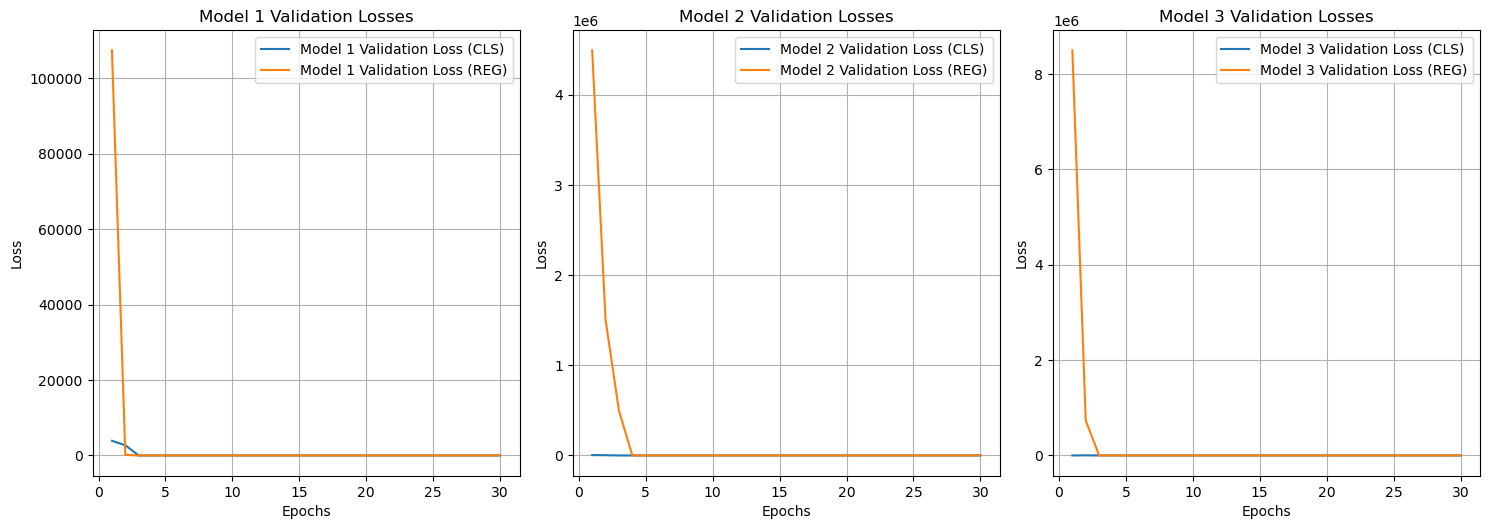

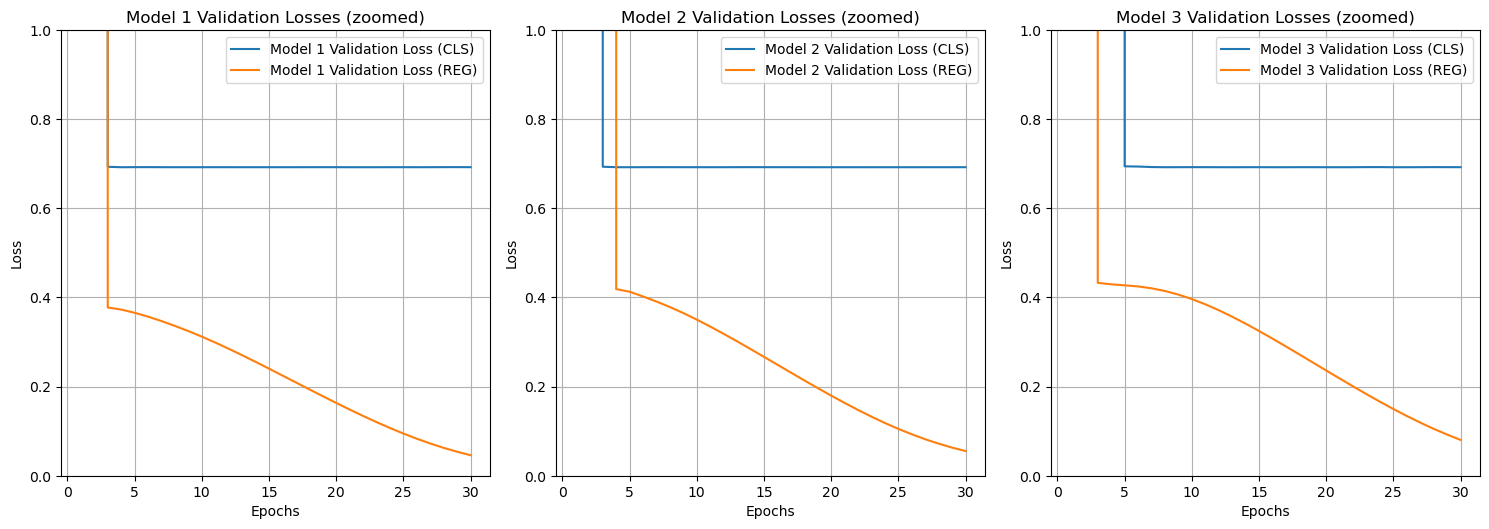

In [105]:
# Plotting
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(15, 10))

# Plot validation losses for each model
for idx, hyperparams in enumerate(hyperparams_list):
    plt.subplot(2, len(hyperparams_list), idx+1)
    plt.plot(epochs, val_losses_cls_list[idx], label=f'Model {idx+1} Validation Loss (CLS)')
    plt.plot(epochs, val_losses_reg_list[idx], label=f'Model {idx+1} Validation Loss (REG)')
    plt.title(f'Model {idx+1} Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(15, 10))

# Plot validation losses for each model
for idx, hyperparams in enumerate(hyperparams_list):
    plt.subplot(2, len(hyperparams_list), idx+1)
    plt.plot(epochs, val_losses_cls_list[idx], label=f'Model {idx+1} Validation Loss (CLS)')
    plt.plot(epochs, val_losses_reg_list[idx], label=f'Model {idx+1} Validation Loss (REG)')
    plt.title(f'Model {idx+1} Validation Losses (zoomed)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 1)  # Set y-axis range between 0 and 1
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [106]:
import numpy as np
import torch
import torch.nn as nn

# Function to compute Intersection over Union (IoU)
def compute_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    intersection = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    box1_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    box2_area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)

    iou = intersection / float(box1_area + box2_area - intersection)
    return iou

# Function to compute mAP
def compute_mAP(y_true, y_pred, iou_thresholds=np.arange(0.5, 1.0, 0.05)):
    sorted_indices = np.argsort(y_pred[:, 0])[::-1]
    y_pred_sorted = y_pred[sorted_indices]

    true_positives = np.zeros(len(y_true))
    false_positives = np.zeros(len(y_true))
    precision = np.zeros(len(y_true))
    recall = np.zeros(len(y_true))
    average_precisions = []

    for idx, threshold in enumerate(iou_thresholds):
        for i in range(len(y_true)):
            true_box = y_true[i]
            pred_box = y_pred_sorted[i]

            iou = compute_iou(true_box, pred_box)

            if iou >= threshold:
                true_positives[i] = 1
                false_positives[i] = 0
            else:
                true_positives[i] = 0
                false_positives[i] = 1

            precision[i] = np.sum(true_positives) / (np.sum(true_positives) + np.sum(false_positives))
            recall[i] = np.sum(true_positives) / len(y_true)

        average_precisions.append(np.mean(precision))

    mAP = np.mean(average_precisions)
    return mAP

# Load each model and compute mAP
model_paths = ["modelMultiHeaded_0.pth", "modelMultiHeaded_1.pth", "modelMultiHeaded_2.pth"]
hidden_dims = [64, 128, 256]
results_mAP = []

for model_path, hidden_dim in zip(model_paths, hidden_dims):
    # Initialize the model with the corresponding hidden_dim
    input_dim = X_test.shape[1]
    output_dim_cls = 2
    output_dim_reg = 4
    model = MultiHeadedModel(input_dim, hidden_dim, output_dim_cls, output_dim_reg)
    
    # Load only matching layers from the saved state_dict
    pretrained_dict = torch.load(model_path)
    model_dict = model.state_dict()
    
    # Filter out unnecessary keys
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
    
    # Update the current model's state_dict
    model_dict.update(pretrained_dict) 
    model.load_state_dict(model_dict)
    
    model.eval()

    # Predict on test data
    with torch.no_grad():
        y_cls_test_pred, y_bbox_test_pred = model(X_test_tensor)
    
    # Convert predictions to numpy arrays
    y_bbox_test_pred_numpy = y_bbox_test_pred.numpy()
    y_bbox_test_true_numpy = y_bbox_test_tensor.numpy()

    # Compute mAP
    mAP = compute_mAP(y_bbox_test_true_numpy, y_bbox_test_pred_numpy)
    results_mAP.append(mAP)

# Print mAP results
for idx, mAP in enumerate(results_mAP):
    print(f"Model: {model_paths[idx]}, hidden_dim: {hidden_dims[idx]}, mAP@[.5:.95]: {mAP:.4f}")

Model: modelMultiHeaded_0.pth, hidden_dim: 64, mAP@[.5:.95]: 0.4306
Model: modelMultiHeaded_1.pth, hidden_dim: 128, mAP@[.5:.95]: 0.3883
Model: modelMultiHeaded_2.pth, hidden_dim: 256, mAP@[.5:.95]: 0.2473


In [107]:
# Adding mAP Results to results
# mAP scores for each model
mAP_scores = [0.4306, 0.3883, 0.2473]

# Add mAP scores to the existing results
for idx, mAP_score in enumerate(mAP_scores):
    results[idx]['mAP Score'] = mAP_score

In [108]:
# Convert results to pandas DataFrame
df = pd.DataFrame(results)

# Rename columns
column_names = {
    'hidden_dim': 'hidden_dim',
    'lr': 'lr',
    'train_loss_cls': 'train_loss_cxe',
    'train_loss_reg': 'train_loss_mse',
    'valid_loss_cls': 'valid_loss_cxe',
    'valid_loss_reg': 'valid_loss_mse',
    'test_loss_cls': 'test_loss_cxe',
    'test_loss_reg': 'test_loss_mse',
    'mAP Score': 'mAP Score (IOU)'
}

df.rename(columns=column_names, inplace=True)

# Set index name
df.index.name = 'Model'

# Display DataFrame
df

hidden_dim     lr  train_loss_cxe  train_loss_mse  valid_loss_cxe  \
Model                                                                      
0              64  0.001        0.693167        0.047045        0.692290   
1             128  0.001        0.691013        0.057353        0.692251   
2             256  0.001        0.693808        0.081883        0.692263   

       valid_loss_mse  test_loss_cxe  test_loss_mse  mAP Score (IOU)  
Model                                                                 
0            0.046013       0.690874       0.046330           0.4306  
1            0.055328       0.690652       0.587574           0.3883  
2            0.080413       0.781760       0.724160           0.2473

The best performing model for cat/dog detection is Model 0, with hidden_dim=64 and lr=0.001, which got an mAP Score of 0.4306.

This model will act as the baseline pipeline for our next phase.